In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import sqlalchemy as sa
from sqlalchemy import text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#SQL Query

In [4]:
engine = sa.create_engine('sqlite:////content/gdrive/MyDrive/Data Analysis/SQL/SQL Databases/COVID_Cases_Mortality_Features_By_Country.sqlite')

In [6]:
# Checking available tables for queries

sql_query = text("""
SELECT name
FROM sqlite_master
WHERE type = 'table';
""")

with engine.connect() as conn:
    result = conn.execute(sql_query)

    print("Tables in the database:")
    for row in result:
        print(row[0])

Tables in the database:
COVID_Data


In [7]:
# Retrieving data

sql_query = text("""
SELECT *
FROM COVID_Data
LIMIT 10;
""")

with engine.connect() as conn:
    result = conn.execute(sql_query)

    headers = result.keys()
    print(headers)

    for row in result:
        print(row)

RMKeyView(['Country', 'Population_Size', 'Tourism', 'Date_FirstFatality', 'Date_FirstConfirmedCase', 'Latitude', 'Longtitude', 'Mean_Age', 'Lockdown_Date', 'Lockdown_Type', 'Cases', 'Deaths', 'Case_Rate', 'Case_Fatality_Ratio', 'Indoor_Pollution_Death_Rate', 'Outdoor_Pollution_Death_Rate'])
('Afghanistan', 37172386, 14000, '3/23/2020', '2/25/2020', 33.93911, 67.709953, 17.3, '3/24/2020', 'Full', 170152, 7488, 457.7376335, 0.044007711, 51.54828729, 134.9937531)
('Albania', 2866376, 5340000, '3/12/2020', '3/10/2020', 41.153332, 20.168331, 36.2, '3/8/2020', 'Full', 267551, 3407, 9334.120855, 0.012734021, 22.6412763, 18.28075417)
('Algeria', 42228429, 2657000, '3/13/2020', '2/26/2020', 28.033886, 1.659626, 27.5, '3/24/2020', 'Full', 261226, 6715, 618.6022217, 0.025705711, 44.02829676, 0.191766503)
('Andorra', 77006, 3042000, '3/23/2020', '3/3/2020', 42.546245, 1.601554, 37.0, '3/16/2020', 'Full', 37140, 148, 48230.00805, 0.003984922, 15.7974753, 0.165664162)
('Angola', 30809762, 218000, '3

In [8]:
# Defining SQL data to Pandas Dataframe

sql_query = text("""
SELECT *
FROM COVID_Data;
""")

with engine.connect() as conn:
    result = conn.execute(sql_query)

    rows = result.fetchall()

    headers = result.keys()

    df = pd.DataFrame(rows, columns=headers)

#Summary Statistics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       173 non-null    object 
 1   population_size               173 non-null    int64  
 2   tourism                       173 non-null    int64  
 3   date_firstfatality            148 non-null    object 
 4   date_firstconfirmedcase       173 non-null    object 
 5   latitude                      173 non-null    float64
 6   longtitude                    173 non-null    float64
 7   mean_age                      173 non-null    float64
 8   lockdown_date                 145 non-null    object 
 9   lockdown_type                 145 non-null    object 
 10  cases                         173 non-null    int64  
 11  deaths                        173 non-null    int64  
 12  case_rate                     173 non-null    float64
 13  case_

In [12]:
df.head()

,country,population_size,tourism,date_firstfatality,date_firstconfirmedcase,latitude,longtitude,mean_age,lockdown_date,lockdown_type,cases,deaths,case_rate,case_fatality_ratio,indoor_pollution_death_rate,outdoor_pollution_death_rate
0,Afghanistan,37172386,14000,3/23/2020,2/25/2020,33.939110,67.709953,17.3,3/24/2020,Full,170152,7488,457.737634,0.044008,51.548287,134.993753
1,Albania,2866376,5340000,3/12/2020,3/10/2020,41.153332,20.168331,36.2,3/8/2020,Full,267551,3407,9334.120855,0.012734,22.641276,18.280754
2,Algeria,42228429,2657000,3/13/2020,2/26/2020,28.033886,1.659626,27.5,3/24/2020,Full,261226,6715,618.602222,0.025706,44.028297,0.191767
3,Andorra,77006,3042000,3/23/2020,3/3/2020,42.546245,1.601554,37.0,3/16/2020,Full,37140,148,48230.008050,0.003985,15.797475,0.165664
4,Angola,30809762,218000,3/30/2020,3/21/2020,-11.202692,17.873887,16.4,None,None,98514,1898,319.749305,0.019266,34.788881,62.199058


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population_size,173.0,4.274614e+07,1.520786e+08,712.000000,2.706049e+06,9.630959e+06,3.080976e+07,1.392730e+09
tourism,173.0,7.573234e+06,1.482967e+07,14000.000000,6.300000e+04,1.781000e+06,8.299000e+06,8.932200e+07
latitude,173.0,2.051126e+01,2.527525e+01,-100.000000,6.611111e+00,1.985627e+01,4.137749e+01,6.496305e+01
longtitude,173.0,1.564566e+01,5.950146e+01,-106.346771,-9.429499e+00,1.864350e+01,4.503819e+01,1.794144e+02
mean_age,173.0,3.090173e+01,8.579434e+00,14.900000,2.380000e+01,3.120000e+01,3.730000e+01,4.630000e+01
cases,173.0,2.355062e+06,7.514866e+06,29.000000,5.584000e+04,3.625270e+05,1.483798e+06,7.770735e+07
deaths,173.0,3.334955e+04,1.024312e+05,0.000000,7.570000e+02,3.993000e+03,1.784400e+04,9.192550e+05
case_rate,173.0,1.157033e+04,1.331655e+04,8.883847,1.180511e+03,7.774491e+03,1.734929e+04,1.000000e+05
case_fatality_ratio,173.0,1.553094e-02,1.226167e-02,0.000000,7.163324e-03,1.216921e-02,2.157842e-02,6.424511e-02
indoor_pollution_death_rate,173.0,3.291611e+01,1.767556e+01,8.439956,1.900907e+01,3.041268e+01,4.081749e+01,1.142312e+02


#Preprocessing

In [9]:
# Converting headers to lower case for ease

df.columns = pd.Series(df.columns).str.lower().str.strip()

In [10]:
# Checking for duplicate rows

df.duplicated().sum()

0

##Null Values

In [15]:
# Checking for Null Values

df.isnull().sum()

,0
country,0
population_size,0
tourism,0
date_firstfatality,25
date_firstconfirmedcase,0
latitude,0
longtitude,0
mean_age,0
lockdown_date,28
lockdown_type,28


<Axes: >

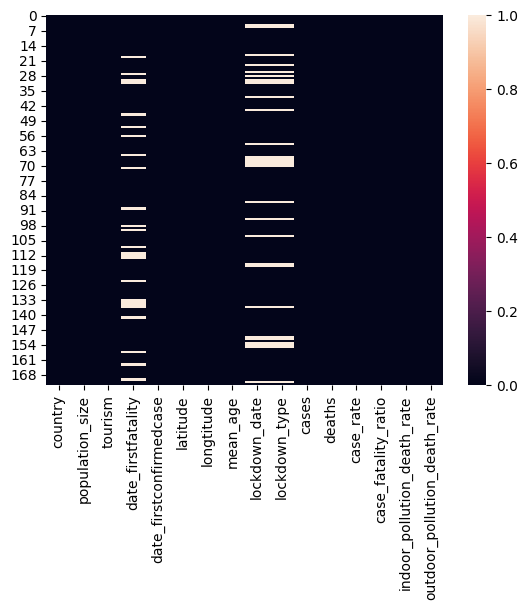

In [14]:
# Visualizing Null Values

sns.heatmap(df.isnull())

In [16]:
# Calling Null Value rows

df[df.isnull().any(axis=1)]

,country,population_size,tourism,date_firstfatality,date_firstconfirmedcase,latitude,longtitude,mean_age,lockdown_date,lockdown_type,cases,deaths,case_rate,case_fatality_ratio,indoor_pollution_death_rate,outdoor_pollution_death_rate
4,Angola,30809762,218000,3/30/2020,3/21/2020,-11.202692,17.873887,16.4,None,None,98514,1898,319.749305,0.019266,34.788881,62.199058
5,Antigua and Barbuda,96286,269000,4/8/2020,3/14/2020,17.060816,-61.796428,30.7,None,None,7331,134,7613.775627,0.018279,30.920300,1.435594
18,Benin,11485048,295000,4/7/2020,3/17/2020,9.307690,2.315834,18.2,None,None,26552,163,231.187541,0.006139,24.968251,89.363955
19,Bhutan,754394,274000,None,3/7/2020,27.514162,90.433601,26.3,3/6/2020,Full,7199,5,954.275882,0.000695,51.965561,24.590261
23,Brunei,428962,14000,3/29/2020,3/10/2020,4.535277,114.727669,37.0,None,None,21579,98,5030.515524,0.004541,20.233162,0.160865
26,Cabo Verde,543767,710000,3/25/2020,3/21/2020,16.538800,-23.041800,23.8,None,None,55840,400,10269.104230,0.007163,26.500961,24.631582
27,Cambodia,16249798,6201000,None,1/28/2020,12.565679,104.990963,24.0,3/28/2020,Partial,123042,3015,757.190951,0.024504,24.160093,84.714835
28,Cameroon,25216237,14000,3/26/2020,3/7/2020,7.369722,12.354722,18.3,None,None,118675,1915,470.629301,0.016137,57.976382,57.178361
30,Central African Republic,4666377,14000,None,3/16/2020,6.611111,20.939444,17.8,None,None,14154,111,303.318827,0.007842,49.099189,153.341457
31,Chad,15477751,14000,None,3/20/2020,15.454166,18.732207,16.1,None,None,7216,190,46.621760,0.026330,34.730344,126.191932


**Null Value Observations**
+ There are 3 columns containing null values
+ 2 broad areas that contain null values
  + date_firstfatality : datetime datatype
  + lockdown_type & lockdown_date : boolean and datetime

I will resolve these values via GenAI by:
+ Querying for the dates of of date_firstfatality and lockdown_date
  + Converting responses to dictionary and filling null_values where possible
+ Filling in all else with a 'no_lockdown' value

### GenAI: 'date_firstfatality'

In [17]:
# Checking the 'country' names of null values in column 'date_firstfatality'

df.loc[df['date_firstfatality'].isnull(), 'country'].values

array(['Bhutan', 'Cambodia', 'Central African Republic', 'Chad',
       'Dominica', 'Eritrea', 'Fiji', 'Grenada', 'Holy See', 'Laos',
       'Madagascar', 'Maldives', 'Mongolia', 'Mozambique', 'Namibia',
       'Nepal', 'Papua New Guinea', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Seychelles',
       'Timor-Leste', 'Uganda', 'Vietnam'], dtype=object)

####Query

In [ ]:
# Necessary imports

import json
import ast
import google.generativeai as genai

In [ ]:
# API configuration

genai.configure(api_key="***")
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# Question

prompt = '''

For the following countries COUNTRYS
can you provide me the dates
based upon a web search
for thier first recorded deaths
resulting from the covid19 pandemic?
Deliver response as only a python dictionary like the example below:

Example:
{"Country1":1900/01/01,
"Country2":1900/01/01,
"Country3":1900/01/01,
"Country4":1900/01/01
}

'''

In [ ]:
# Defining and passing Null countries in 'date_firstfatality' as a list
null_countries = df.loc[df['date_firstfatality'].isnull(), 'country'].values

# Defining prompt
prompt = prompt.replace('COUNTRYS', str(null_countries))
prompt

'\n\nFor the following countries [\'Bhutan\' \'Cambodia\' \'Central African Republic\' \'Chad\' \'Dominica\'\n \'Eritrea\' \'Fiji\' \'Grenada\' \'Holy See\' \'Laos\' \'Madagascar\' \'Maldives\'\n \'Mongolia\' \'Mozambique\' \'Namibia\' \'Nepal\' \'Papua New Guinea\' \'Rwanda\'\n \'Saint Kitts and Nevis\' \'Saint Lucia\' \'Saint Vincent and the Grenadines\'\n \'Seychelles\' \'Timor-Leste\' \'Uganda\' \'Vietnam\']\ncan you provide me the dates\nbased upon a web search\nfor thier first recorded deaths\nresulting from the covid19 pandemic?\nDeliver response as only a python dictionary like the example below:\n\nExample:\n{"Country1":1900/01/01,\n"Country2":1900/01/01,\n"Country3":1900/01/01,\n"Country4":1900/01/01\n}\n\n'

In [ ]:
# GenAI response

response = model.generate_content(prompt)
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "```python\ncovid19_first_deaths = {\n    \"Bhutan\": \"2021-01-04\",\n    \"Cambodia\": \"2021-03-11\",\n    \"Central African Republic\": \"2020-04-03\",\n    \"Chad\": \"2020-04-25\",\n    \"Dominica\": \"2020-11-06\",\n    \"Eritrea\": \"2021-01-27\",\n    \"Fiji\": \"2021-04-19\",\n    \"Grenada\": \"2020-06-20\",\n    \"Holy See\": \"2020-03-06\",\n    \"Laos\": \"2020-07-23\",\n    \"Madagascar\": \"2020-04-29\",\n    \"Maldives\": \"2020-05-27\",\n    \"Mongolia\": \"2021-03-11\",\n    \"Mozambique\": \"2020-04-22\",\n    \"Namibia\": \"2020-03-21\",\n    \"Nepal\": \"2020-05-16\",\n    \"Papua New Guinea\": \"2020-07-06\",\n    \"Rwanda\": \"2020-03-31\",\n    \"Saint Kitts and Nevis\": \"2020-08-25\",\n    \"Saint Lucia\": \"2020-06-03\",\n    \"Sai

In [ ]:
# Retrieving response as dictionary

response_dict = response.candidates[0].content.parts[0].text
response_dict

'```python\ncovid19_first_deaths = {\n    "Bhutan": "2021-01-04",\n    "Cambodia": "2021-03-11",\n    "Central African Republic": "2020-04-03",\n    "Chad": "2020-04-25",\n    "Dominica": "2020-11-06",\n    "Eritrea": "2021-01-27",\n    "Fiji": "2021-04-19",\n    "Grenada": "2020-06-20",\n    "Holy See": "2020-03-06",\n    "Laos": "2020-07-23",\n    "Madagascar": "2020-04-29",\n    "Maldives": "2020-05-27",\n    "Mongolia": "2021-03-11",\n    "Mozambique": "2020-04-22",\n    "Namibia": "2020-03-21",\n    "Nepal": "2020-05-16",\n    "Papua New Guinea": "2020-07-06",\n    "Rwanda": "2020-03-31",\n    "Saint Kitts and Nevis": "2020-08-25",\n    "Saint Lucia": "2020-06-03",\n    "Saint Vincent and the Grenadines": "2020-12-28",\n    "Seychelles": "2021-04-10",\n    "Timor-Leste": "2020-04-10",\n    "Uganda": "2020-03-21",\n    "Vietnam": "2020-07-31",\n}\n```'

In [ ]:
# Cleaning response for data clarity

cleaned_response = response_dict.replace("```python", "").replace("```", "").replace("covid19_first_deaths =", "").strip()

In [ ]:
# Response cleaned and data ready to fill null values

data_dict = ast.literal_eval(cleaned_response)
data_dict

{'Bhutan': '2021-01-04',
 'Cambodia': '2021-03-11',
 'Central African Republic': '2020-04-03',
 'Chad': '2020-04-25',
 'Dominica': '2020-11-06',
 'Eritrea': '2021-01-27',
 'Fiji': '2021-04-19',
 'Grenada': '2020-06-20',
 'Holy See': '2020-03-06',
 'Laos': '2020-07-23',
 'Madagascar': '2020-04-29',
 'Maldives': '2020-05-27',
 'Mongolia': '2021-03-11',
 'Mozambique': '2020-04-22',
 'Namibia': '2020-03-21',
 'Nepal': '2020-05-16',
 'Papua New Guinea': '2020-07-06',
 'Rwanda': '2020-03-31',
 'Saint Kitts and Nevis': '2020-08-25',
 'Saint Lucia': '2020-06-03',
 'Saint Vincent and the Grenadines': '2020-12-28',
 'Seychelles': '2021-04-10',
 'Timor-Leste': '2020-04-10',
 'Uganda': '2020-03-21',
 'Vietnam': '2020-07-31'}

In [19]:
# Cementing (fixing) the answer to repeatability

genai_answer1 = {
 'Bhutan': '2021-02-01',
 'Cambodia': '2021-03-11',
 'Central African Republic': '2020-04-03',
 'Chad': '2020-03-25',
 'Dominica': '2020-07-25',
 'Eritrea': '2020-04-22',
 'Fiji': '2020-07-19',
 'Grenada': '2020-08-01',
 'Holy See': '2020-03-06',
 'Laos': '2021-07-10',
 'Madagascar': '2021-05-04',
 'Maldives': '2020-04-29',
 'Mongolia': '2020-11-13',
 'Mozambique': '2020-04-22',
 'Namibia': '2020-03-17',
 'Nepal': '2020-05-16',
 'Papua New Guinea': '2020-03-29',
 'Rwanda': '2020-03-31',
 'Saint Kitts and Nevis': '2020-09-15',
 'Saint Lucia': '2020-05-05',
 'Saint Vincent and the Grenadines': '2020-06-06',
 'Seychelles': '2020-04-10',
 'Timor-Leste': '2021-04-22',
 'Uganda': '2020-07-21',
 'Vietnam': '2020-03-29'
}

### GenAI: 'lockdown_date' & 'lockdown_type'

In [ ]:
# # Checking the 'country' names of null values in column 'lockdown_date'

df.loc[df['lockdown_date'].isnull(), 'country'].values

array(['Angola', 'Antigua and Barbuda', 'Benin', 'Brunei', 'Cabo Verde',
       'Cameroon', 'Central African Republic', 'Chad', "Cote d'Ivoire",
       'Diamond Princess', 'Gambia', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Korea, South',
       'Liechtenstein', 'Mauritania', 'Nicaragua', 'Niger',
       'Saint Vincent and the Grenadines', 'Suriname', 'Sweden', 'Syria',
       'Taiwan', 'Tanzania', 'Zambia'], dtype=object)

####Query

In [ ]:
# Question

prompt2 = '''

For the following countries COUNTRYS
can you provide me the date
based upon a web search
for when that country did go into lockdown
during the covid19 pandemic
and if they did not go into lockdown,
return a null value?
Deliver response as only a python dictionary like the example below:

Example:
{"Country1":1900/01/01,
"Country2":1900/01/01,
"Country3":1900/01/01,
"Country4":NaN
}

'''

In [ ]:
# Defining and passing Null countries in 'lockdown_date' as a list
null_countriesld = df.loc[df['lockdown_date'].isnull(), 'country'].values

# Defining prompt
prompt2 = prompt2.replace('COUNTRYS', str(null_countriesld))
prompt2

'\n\nFor the following countries [\'Angola\' \'Antigua and Barbuda\' \'Benin\' \'Brunei\' \'Cabo Verde\' \'Cameroon\'\n \'Central African Republic\' \'Chad\' "Cote d\'Ivoire" \'Diamond Princess\'\n \'Gambia\' \'Guatemala\' \'Guinea\' \'Guinea-Bissau\' \'Guyana\' \'Haiti\'\n \'Korea, South\' \'Liechtenstein\' \'Mauritania\' \'Nicaragua\' \'Niger\'\n \'Saint Vincent and the Grenadines\' \'Suriname\' \'Sweden\' \'Syria\' \'Taiwan\'\n \'Tanzania\' \'Zambia\']\ncan you provide me the date\nbased upon a web search\nfor when that country did go into lockdown\nduring the covid19 pandemic\nand if they did not go into lockdown,\nreturn a null value?\nDeliver response as only a python dictionary like the example below:\n\nExample:\n{"Country1":1900/01/01,\n"Country2":1900/01/01,\n"Country3":1900/01/01,\n"Country4":NaN\n}\n\n'

In [ ]:
# GenAI response

response2 = model.generate_content(prompt2)
response2

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "```python \ncovid19_lockdown_dates = {\n    \"Angola\": \"2020-03-27\",\n    \"Antigua and Barbuda\": null,\n    \"Benin\": \"2020-04-08\",\n    \"Brunei\": \"2020-03-23\",\n    \"Cabo Verde\": null,\n    \"Cameroon\": \"2020-03-18\",\n    \"Central African Republic\": null,\n    \"Chad\": null,\n    \"C\u00f4te d'Ivoire\": \"2020-03-24\",\n    \"Diamond Princess\": \"2020-02-05\",\n    \"Gambia\": null,\n    \"Guatemala\": \"2020-03-15\",\n    \"Guinea\": \"2020-03-26\",\n    \"Guinea-Bissau\": \"2020-03-28\",\n    \"Guyana\": \"2020-03-16\",\n    \"Haiti\": \"2020-03-19\",\n    \"Korea, South\": \"2020-01-23\",\n    \"Liechtenstein\": \"2020-03-13\",\n    \"Mauritania\": \"2020-03-23\",\n    \"Nicaragua\": null,\n    \"Niger\": \"2020-03-27\",\n    \"Saint

In [ ]:
# Retrieving response as dictionary

response_dict2 = response2.candidates[0].content.parts[0].text
response_dict2

'```python \ncovid19_lockdown_dates = {\n    "Angola": "2020-03-27",\n    "Antigua and Barbuda": null,\n    "Benin": "2020-04-08",\n    "Brunei": "2020-03-23",\n    "Cabo Verde": null,\n    "Cameroon": "2020-03-18",\n    "Central African Republic": null,\n    "Chad": null,\n    "Côte d\'Ivoire": "2020-03-24",\n    "Diamond Princess": "2020-02-05",\n    "Gambia": null,\n    "Guatemala": "2020-03-15",\n    "Guinea": "2020-03-26",\n    "Guinea-Bissau": "2020-03-28",\n    "Guyana": "2020-03-16",\n    "Haiti": "2020-03-19",\n    "Korea, South": "2020-01-23",\n    "Liechtenstein": "2020-03-13",\n    "Mauritania": "2020-03-23",\n    "Nicaragua": null,\n    "Niger": "2020-03-27",\n    "Saint Vincent and the Grenadines": "2020-03-26",\n    "Suriname": "2020-03-31",\n    "Sweden": null,\n    "Syria": "2020-03-24",\n    "Taiwan": "2020-01-20",\n    "Tanzania": "2020-04-18",\n    "Zambia": "2020-05-14",\n}\n```'

In [ ]:
# Cleaning response for data clarity

cleaned_response2 = response_dict2.replace("```python", "").replace("```", "").replace("covid19_lockdown_dates =", "").replace("null", "None").strip()
print(cleaned_response2)

{
    "Angola": "2020-03-27",
    "Antigua and Barbuda": None,
    "Benin": "2020-04-08",
    "Brunei": "2020-03-23",
    "Cabo Verde": None,
    "Cameroon": "2020-03-18",
    "Central African Republic": None,
    "Chad": None,
    "Côte d'Ivoire": "2020-03-24",
    "Diamond Princess": "2020-02-05",
    "Gambia": None,
    "Guatemala": "2020-03-15",
    "Guinea": "2020-03-26",
    "Guinea-Bissau": "2020-03-28",
    "Guyana": "2020-03-16",
    "Haiti": "2020-03-19",
    "Korea, South": "2020-01-23",
    "Liechtenstein": "2020-03-13",
    "Mauritania": "2020-03-23",
    "Nicaragua": None,
    "Niger": "2020-03-27",
    "Saint Vincent and the Grenadines": "2020-03-26",
    "Suriname": "2020-03-31",
    "Sweden": None,
    "Syria": "2020-03-24",
    "Taiwan": "2020-01-20",
    "Tanzania": "2020-04-18",
    "Zambia": "2020-05-14",
}


In [ ]:
data_dict2 = ast.literal_eval(cleaned_response2)
data_dict2

{'Angola': '2020-03-27',
 'Antigua and Barbuda': None,
 'Benin': '2020-04-08',
 'Brunei': '2020-03-23',
 'Cabo Verde': None,
 'Cameroon': '2020-03-18',
 'Central African Republic': None,
 'Chad': None,
 "Côte d'Ivoire": '2020-03-24',
 'Diamond Princess': '2020-02-05',
 'Gambia': None,
 'Guatemala': '2020-03-15',
 'Guinea': '2020-03-26',
 'Guinea-Bissau': '2020-03-28',
 'Guyana': '2020-03-16',
 'Haiti': '2020-03-19',
 'Korea, South': '2020-01-23',
 'Liechtenstein': '2020-03-13',
 'Mauritania': '2020-03-23',
 'Nicaragua': None,
 'Niger': '2020-03-27',
 'Saint Vincent and the Grenadines': '2020-03-26',
 'Suriname': '2020-03-31',
 'Sweden': None,
 'Syria': '2020-03-24',
 'Taiwan': '2020-01-20',
 'Tanzania': '2020-04-18',
 'Zambia': '2020-05-14'}

In [20]:
# Cementing (fixing) the answer to repeatability

genai_answer2 = {
 'Angola': '2020-03-27',
 'Antigua and Barbuda': None,
 'Benin': '2020-04-08',
 'Brunei': '2020-03-18',
 'Cabo Verde': '2020-03-28',
 'Cameroon': '2020-03-18',
 'Central African Republic': None,
 'Chad': None,
 "Cote d'Ivoire": '2020-03-24',
 'Diamond Princess': '2020-02-05',
 'Gambia': '2020-03-20',
 'Guatemala': '2020-03-21',
 'Guinea': '2020-03-26',
 'Guinea-Bissau': '2020-03-28',
 'Guyana': '2020-03-18',
 'Haiti': '2020-03-19',
 'Korea, South': '2020-02-23',
 'Liechtenstein': None,
 'Mauritania': '2020-03-25',
 'Nicaragua': None,
 'Niger': '2020-03-27',
 'Saint Vincent and the Grenadines': None,
 'Suriname': '2020-03-30',
 'Sweden': None,
 'Syria': None,
 'Taiwan': '2020-01-20',
 'Tanzania': None,
 'Zambia': '2020-03-18'
}

##String Cleaning

###Data Types

In [21]:
# Converting our datetime columns to a pandas DateTime datatype

df['date_firstfatality'] = pd.to_datetime(df['date_firstfatality'], errors='coerce')
df['date_firstconfirmedcase'] = pd.to_datetime(df['date_firstconfirmedcase'], errors='coerce')
df['lockdown_date'] = pd.to_datetime(df['lockdown_date'], errors='coerce')

###Null Values

In [22]:
# Filling 'date_firstfatality' & 'lockdown_date' with genAI dictionary answers
df['date_firstfatality'] = df['date_firstfatality'].fillna(df['country'].map(genai_answer1))
df['lockdown_date'] = df['lockdown_date'].fillna(df['country'].map(genai_answer2))
# All remaining values to be filled with 'No Lockdown'
df['lockdown_type'] = df['lockdown_type'].replace(pd.NaT, 'No Lockdown')

###Miscellaneous

In [23]:
# Cleaning observed inconsistencies
df = df.drop('case_fatality_ratio', axis=1)
df['case_fatality_ratio'] = df['deaths']/df['cases']

# Adding a new column to calculate days it took to implement lockdown from first case
df['lockdown_delay'] = (df['lockdown_date'] - df['date_firstconfirmedcase']).dt.days

In [24]:
df.isnull().sum()

,0
country,0
population_size,0
tourism,0
date_firstfatality,0
date_firstconfirmedcase,0
latitude,0
longtitude,0
mean_age,0
lockdown_date,9
lockdown_type,0


**Only 9 values counted as NaT which will not interfere with data manipulation**

In [ ]:
df[df.isnull().any(axis=1)]

,country,population_size,tourism,date_firstfatality,date_firstconfirmedcase,latitude,longtitude,mean_age,lockdown_date,lockdown_type,cases,deaths,case_rate,indoor_pollution_death_rate,outdoor_pollution_death_rate,case_fatality_ratio,lockdown_delay
5,Antigua and Barbuda,96286,269000,2020-04-08,2020-03-14,17.060816,-61.796428,30.7,NaT,No Lockdown,7331,134,7613.775627,30.920300,1.435594,0.018279,NaN
30,Central African Republic,4666377,14000,2020-04-03,2020-03-16,6.611111,20.939444,17.8,NaT,No Lockdown,14154,111,303.318827,49.099189,153.341457,0.007842,NaN
31,Chad,15477751,14000,2020-03-25,2020-03-20,15.454166,18.732207,16.1,NaT,No Lockdown,7216,190,46.621760,34.730344,126.191932,0.026330,NaN
95,Liechtenstein,37910,85300,2020-04-05,2020-03-05,47.166000,9.555373,37.0,NaT,No Lockdown,10451,74,27567.924030,11.768977,0.188248,0.007081,NaN
116,Nicaragua,6465513,1256000,2020-03-28,2020-03-20,12.865416,-85.207229,25.2,NaT,No Lockdown,17791,222,275.167647,11.957884,21.764928,0.012478,NaN
136,Saint Vincent and the Grenadines,110210,14000,2020-06-06,2020-03-15,12.984305,-61.287228,29.8,NaT,No Lockdown,8144,102,7389.529081,38.272395,10.414223,0.012525,NaN
151,Sweden,10175214,7440000,2020-03-12,2020-02-01,60.128161,18.643501,40.9,NaT,No Lockdown,2397330,16501,23560.487280,9.330760,0.175397,0.006883,NaN
153,Syria,16906283,14000,2020-03-30,2020-03-23,34.802075,38.996815,37.0,NaT,No Lockdown,52626,3026,311.280723,64.936173,0.088205,0.057500,NaN
155,Tanzania,56318348,1378000,2020-04-01,2020-03-17,-6.369028,34.888822,37.0,NaT,No Lockdown,33436,792,59.369639,18.407445,78.767305,0.023687,NaN


##Outlier Detection

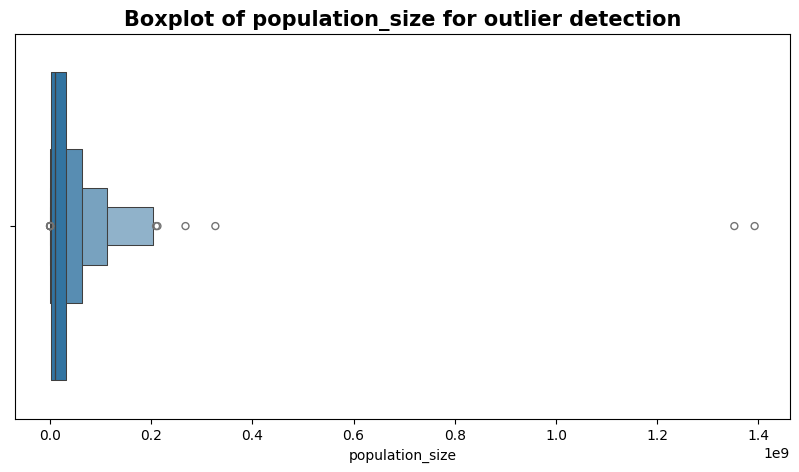

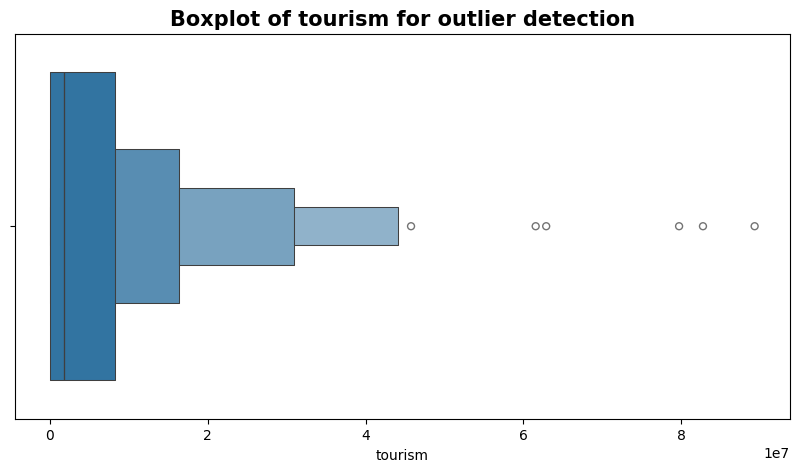

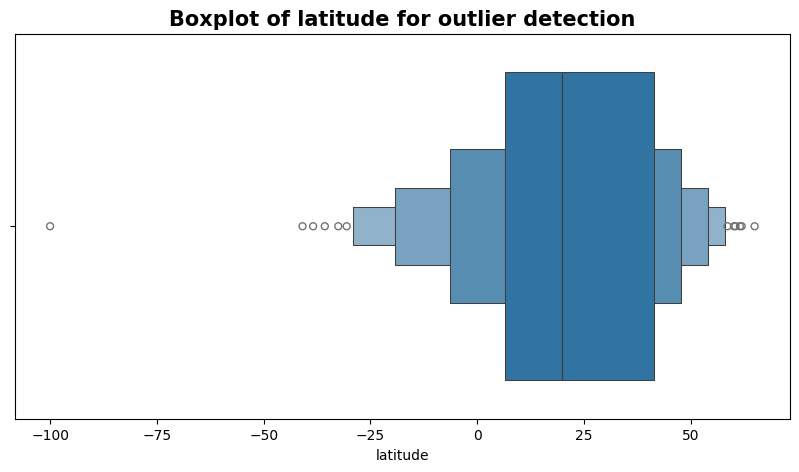

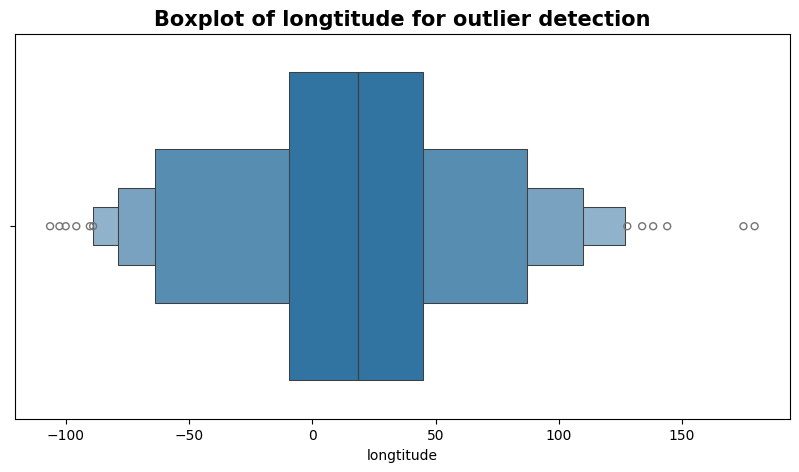

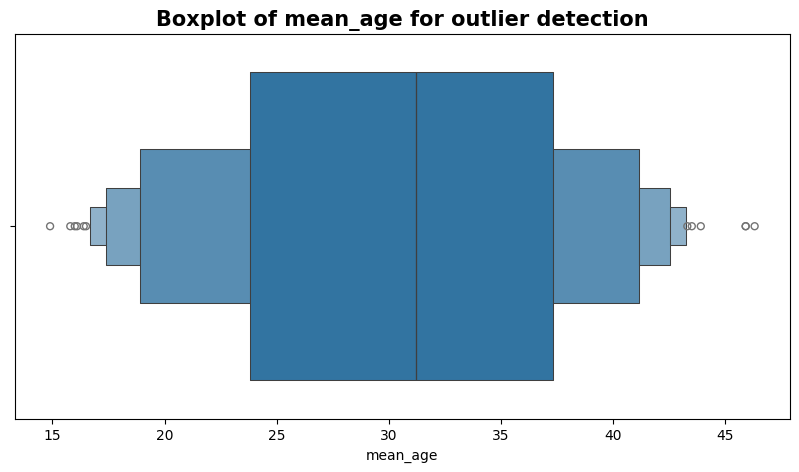

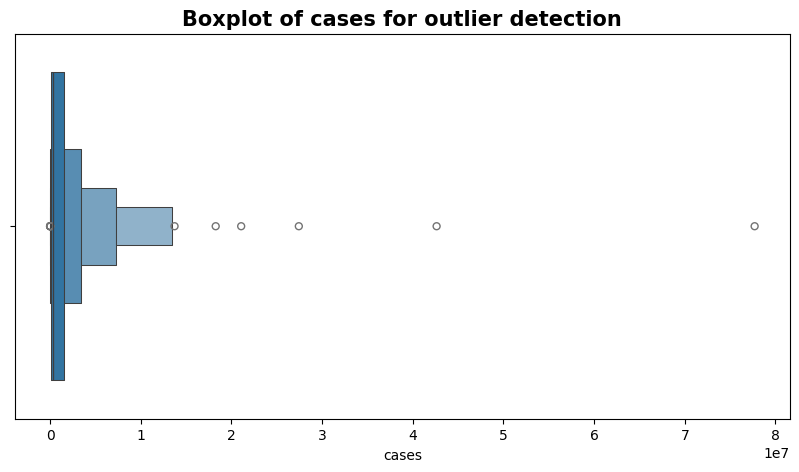

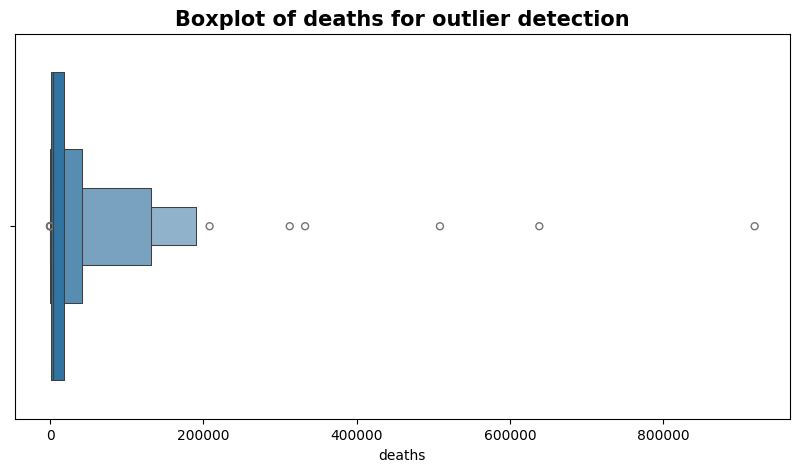

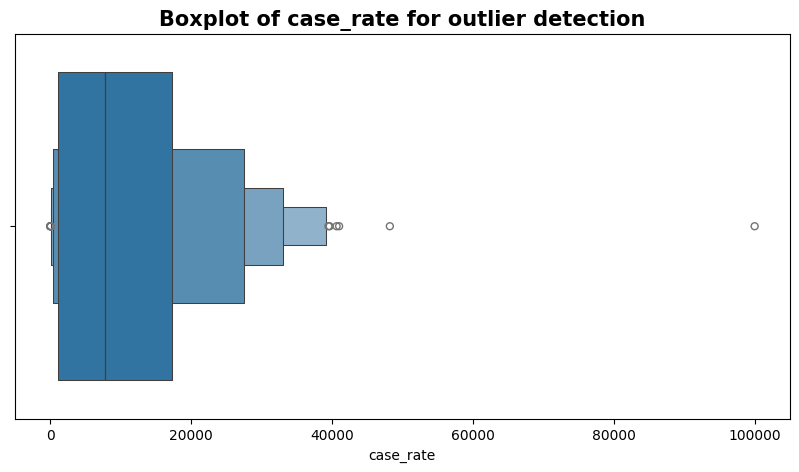

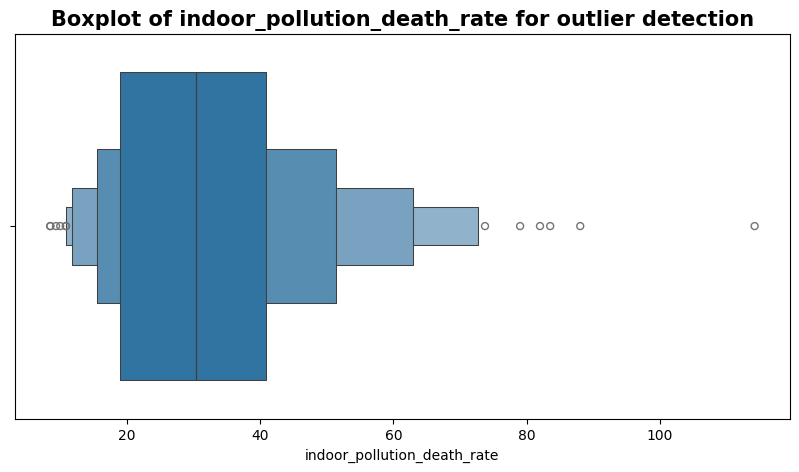

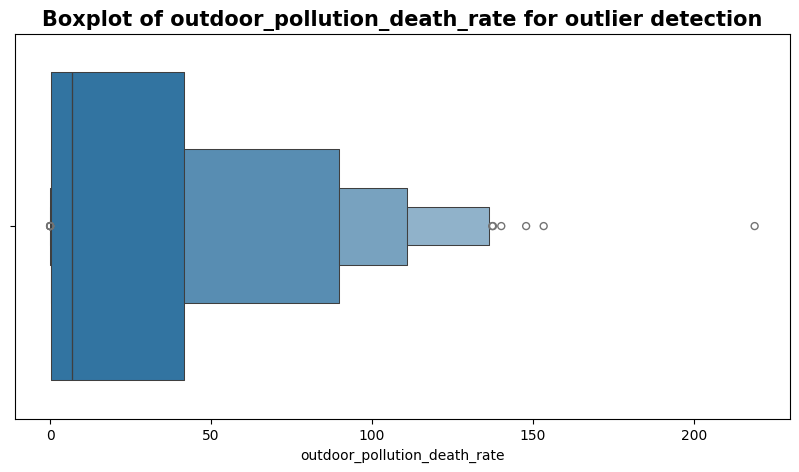

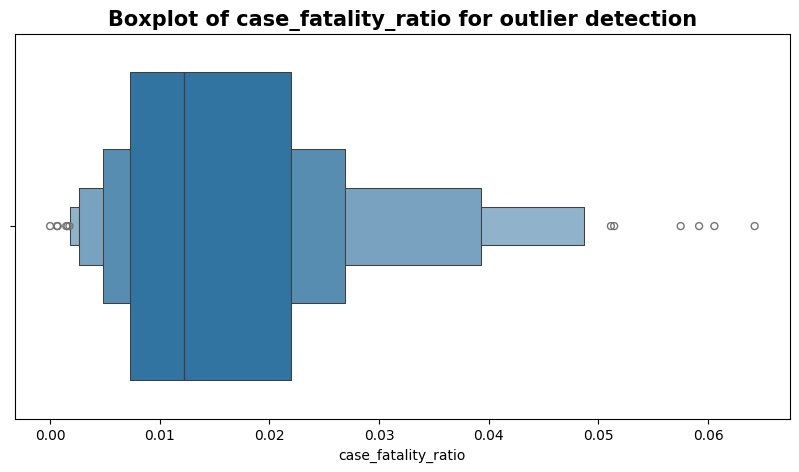

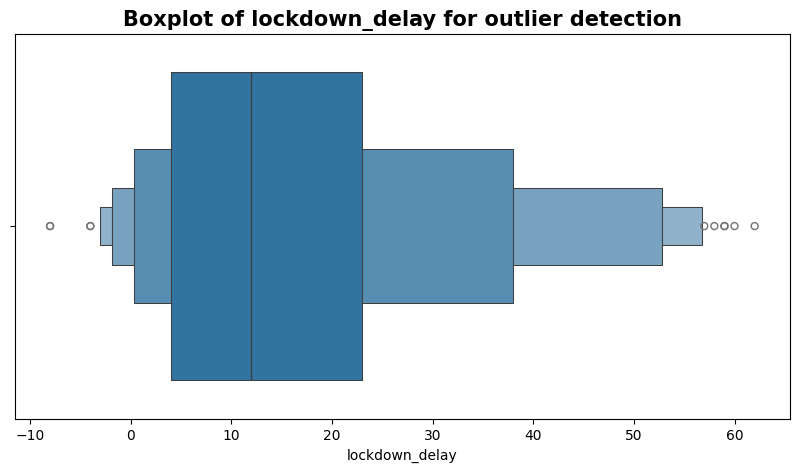

In [ ]:
# Boxplots (boxenplot) of all numerical data columns to observe outlier distribution

for feat in df.columns:
    if pd.api.types.is_numeric_dtype(df[feat]):
        plt.figure(figsize=(10,5))
        sns.boxenplot(x=df[feat])
        plt.title(f'Boxplot of {feat} for outlier detection', fontsize = 15, fontweight = 'bold')

#EDA

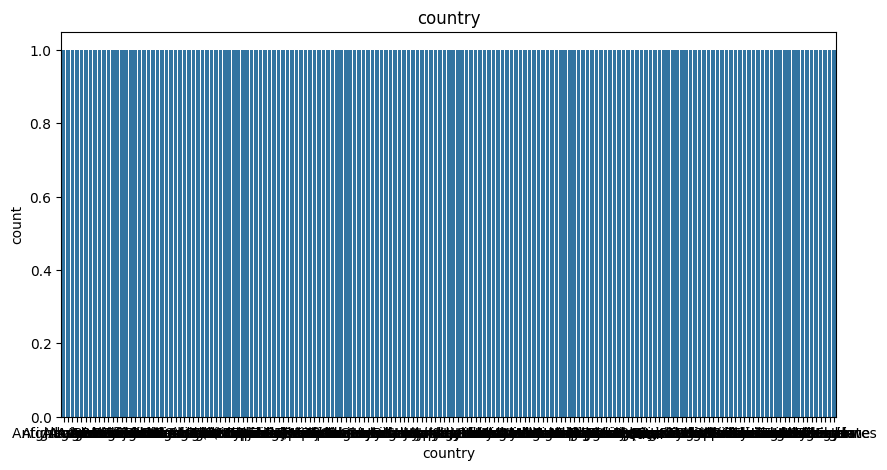

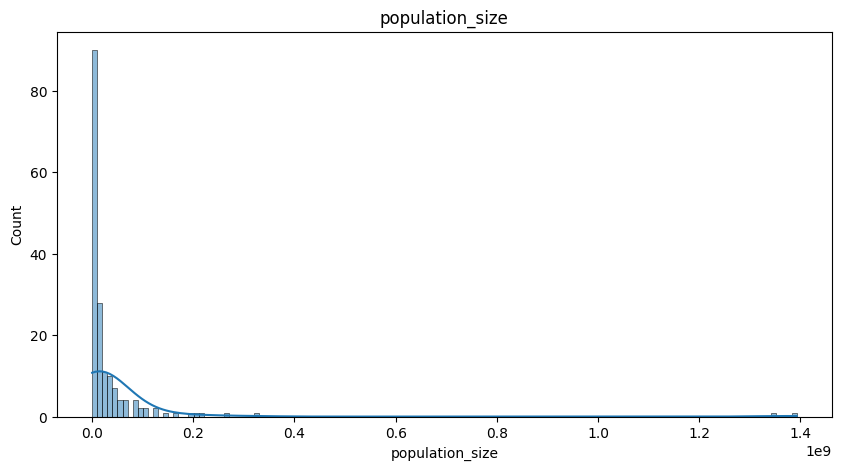

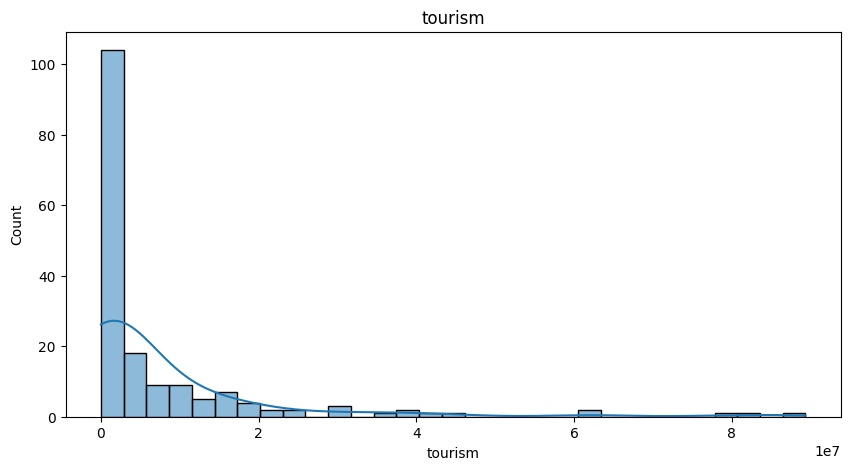

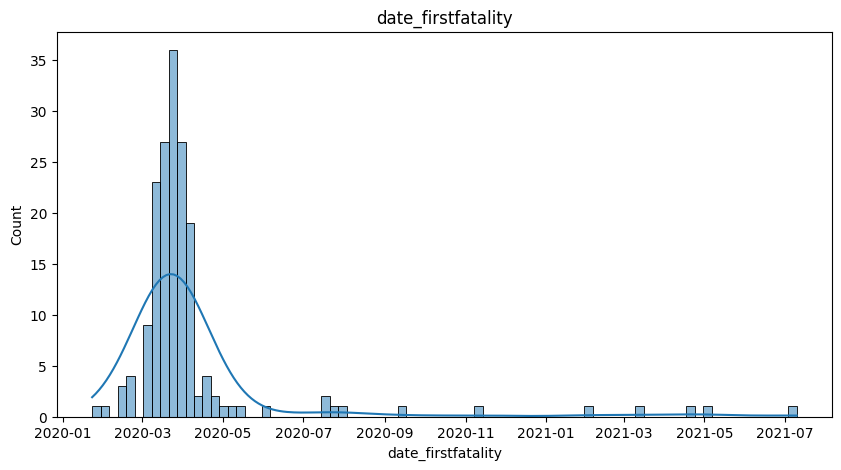

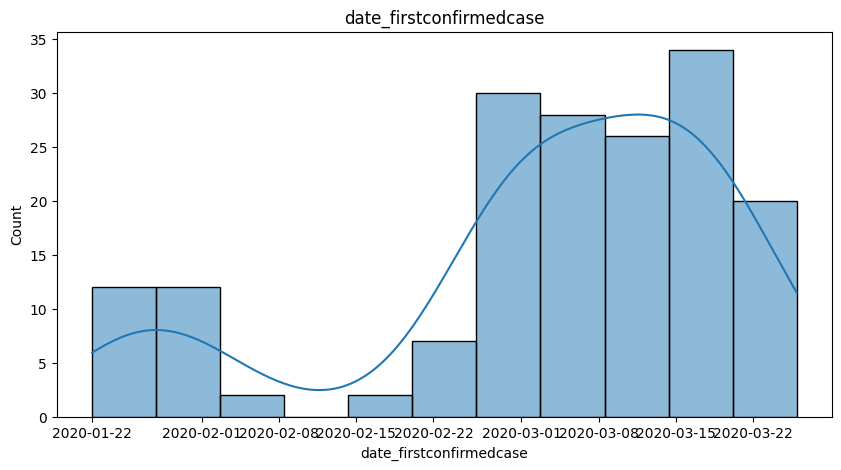

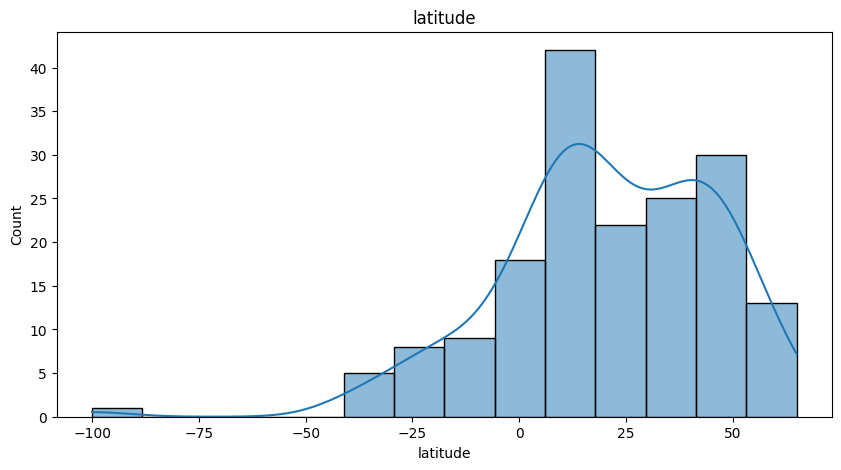

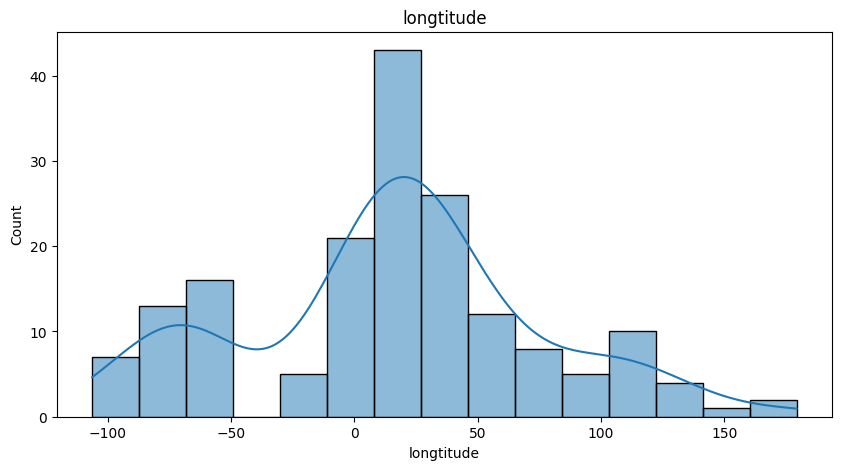

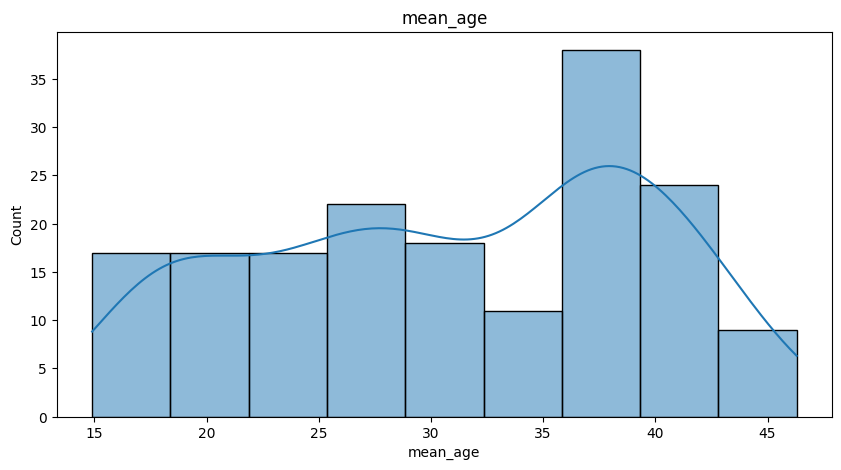

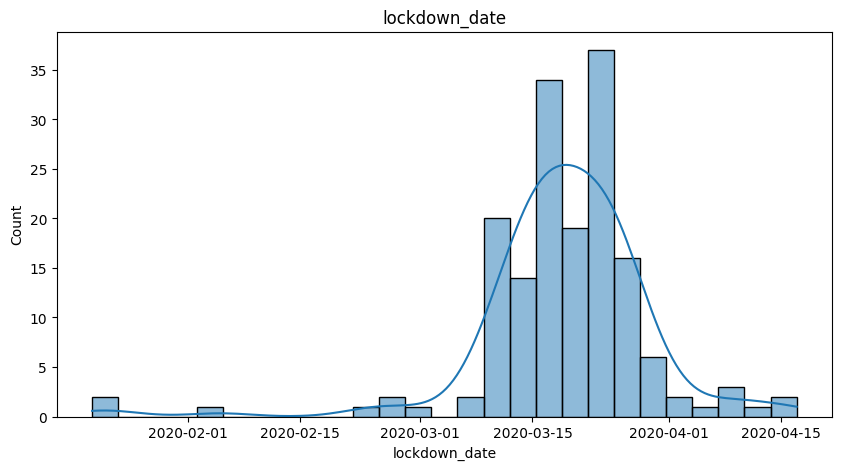

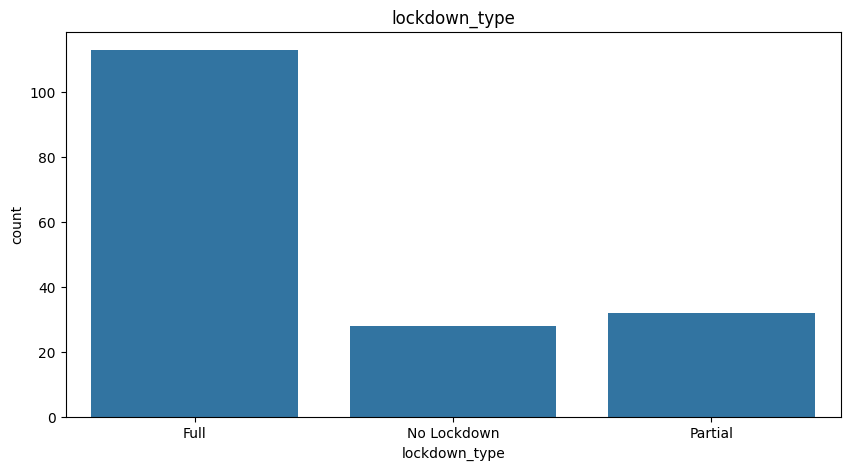

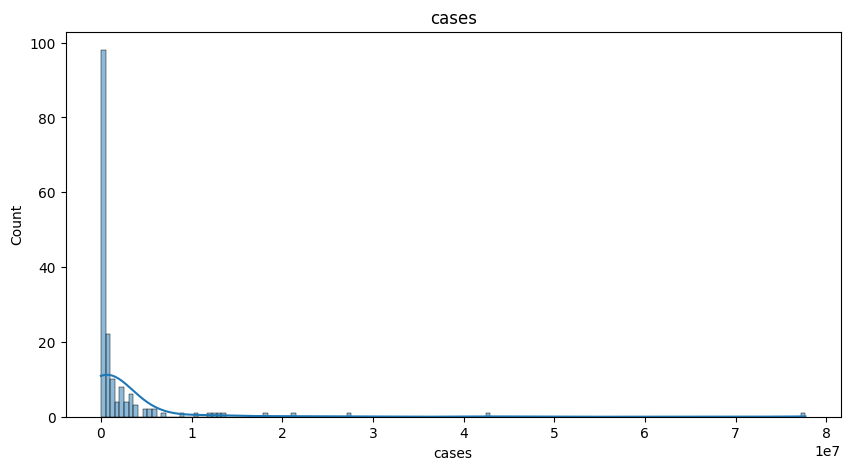

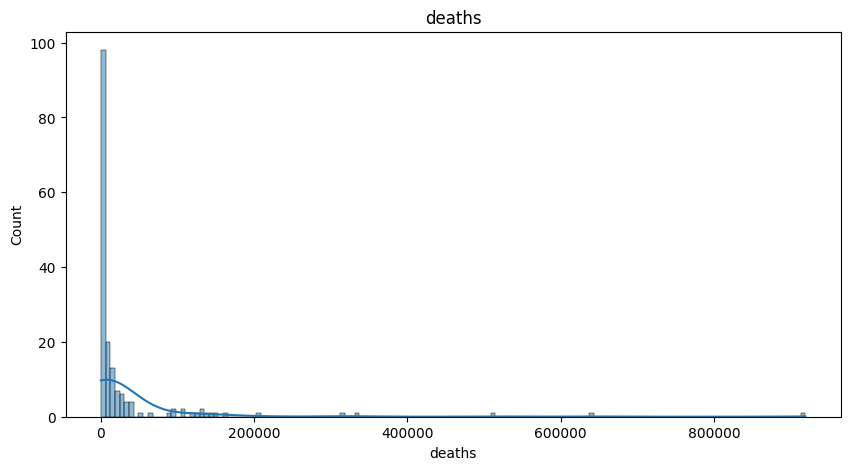

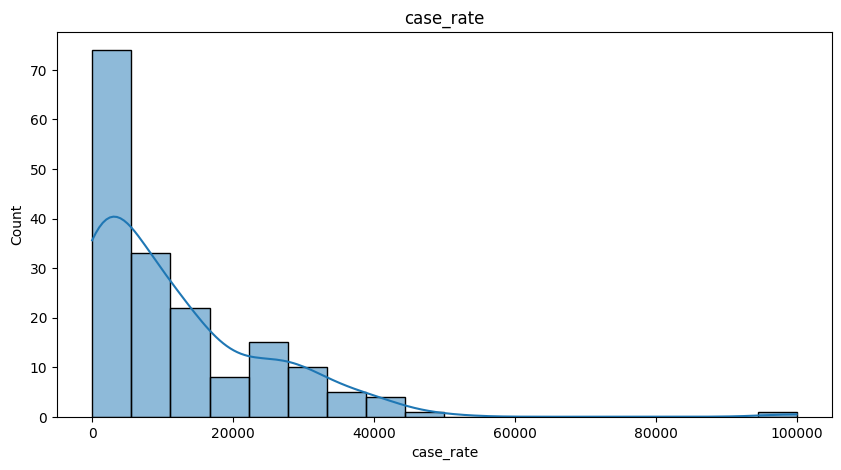

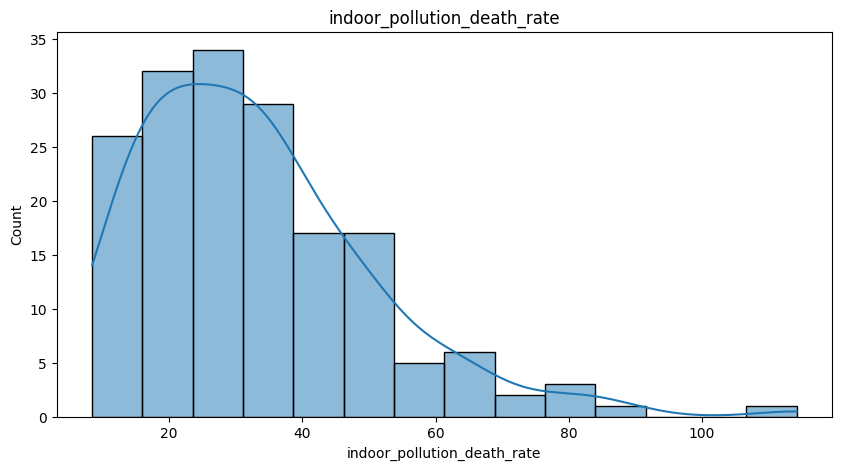

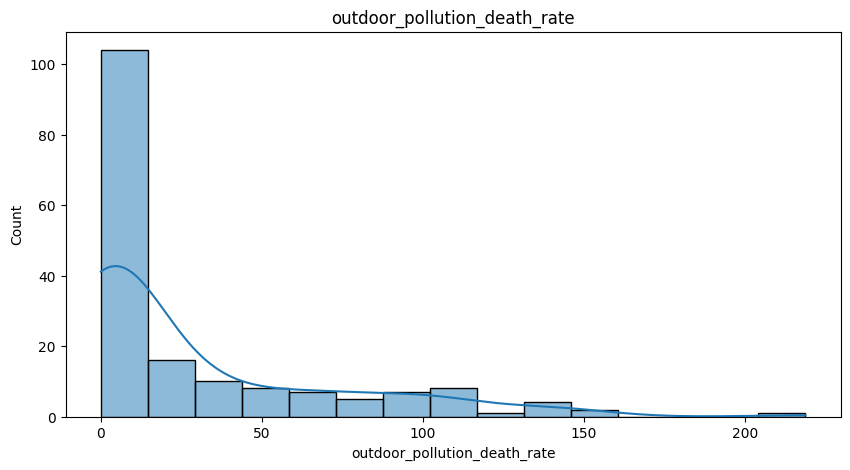

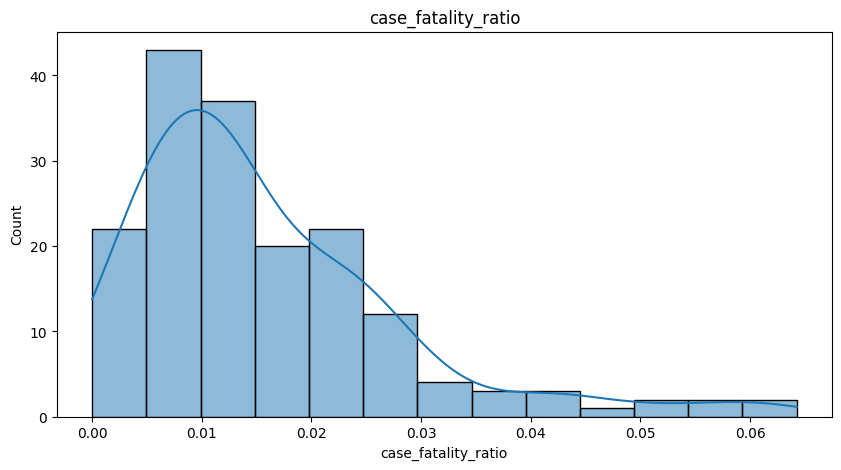

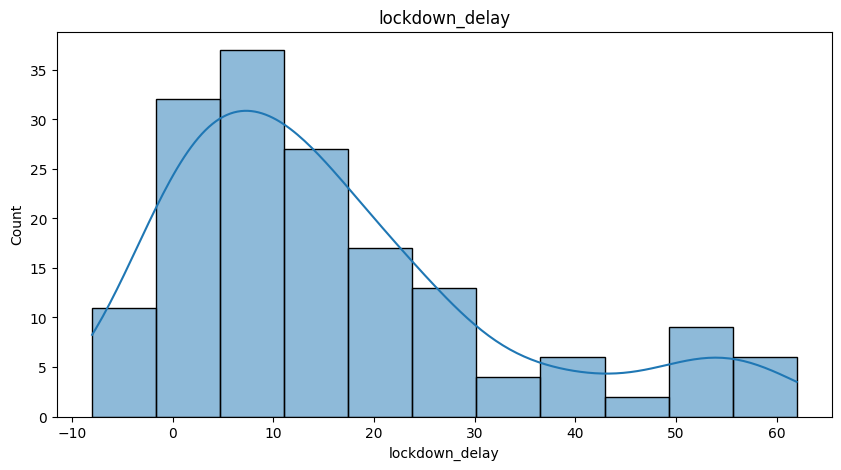

In [ ]:
# Count & Histogram plots to observe statistical distributions

for feat in df.columns:
  plt.figure(figsize=(10,5))
  if df[feat].dtype == 'object':
    sns.countplot(x=df[feat])
  else:
    sns.histplot(df[feat], kde=True)
  plt.title(feat)

**Observations**


+ Country - Categorical - Uniform distribution
+ Population Size - Numerical - Exponential (heavy right skew)
+ Tourism - Numerical - Exponential (right skew)
+ Date First Fatality - Date - (right skew)
+ Date First Confirmed Case - Date - (2 peak)
+ Mean age - Numerical - Uniform - (right peak)
+ Lockdown Date - Date - Standard (left peak)
+ Lockdown Type - Categorical - (right skew)
+ Cases - Numerical - Exponential (heavy right skew)
+ Deaths - Numerical - Exponential (heavy right skew)
+ Case Rate - Numerical - Exponential (right skew)
+ Indoor Pollution rate - Expnential (right skew)
+ Outdoor Pollution rate - Exponential (heavy right skew)
+ Case fatality ratio - Numerical - Standard (right skew)
+ Lockdown delay - Numerical - Standard (2 peak)

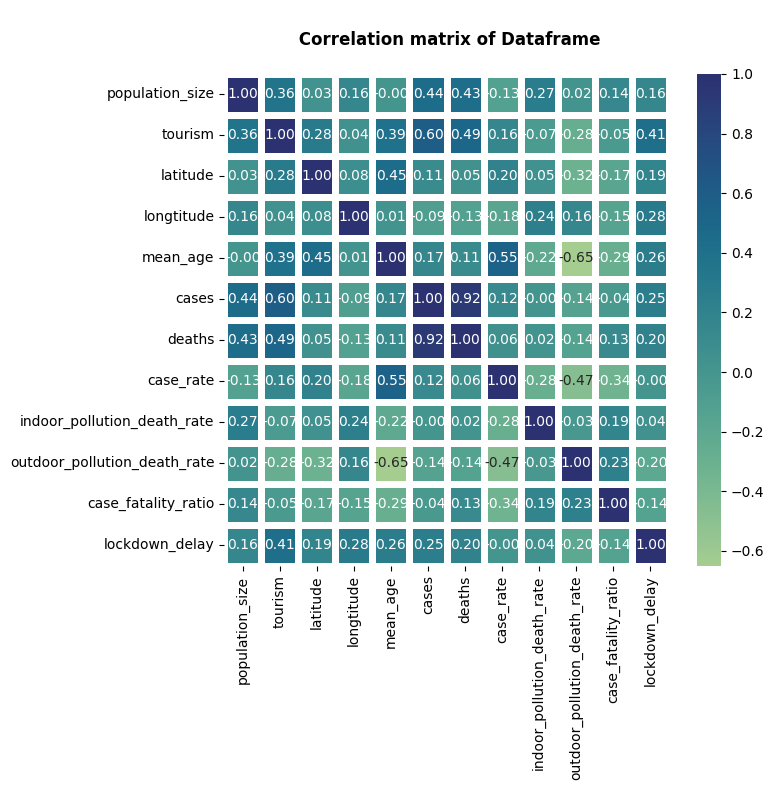

In [ ]:
# Correlation Matrix to help direct analysis

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            lw = 5,
            cmap='crest',
            fmt='.2f')
plt.title('\n Correlation matrix of Dataframe\n', fontweight='bold')
plt.tight_layout()

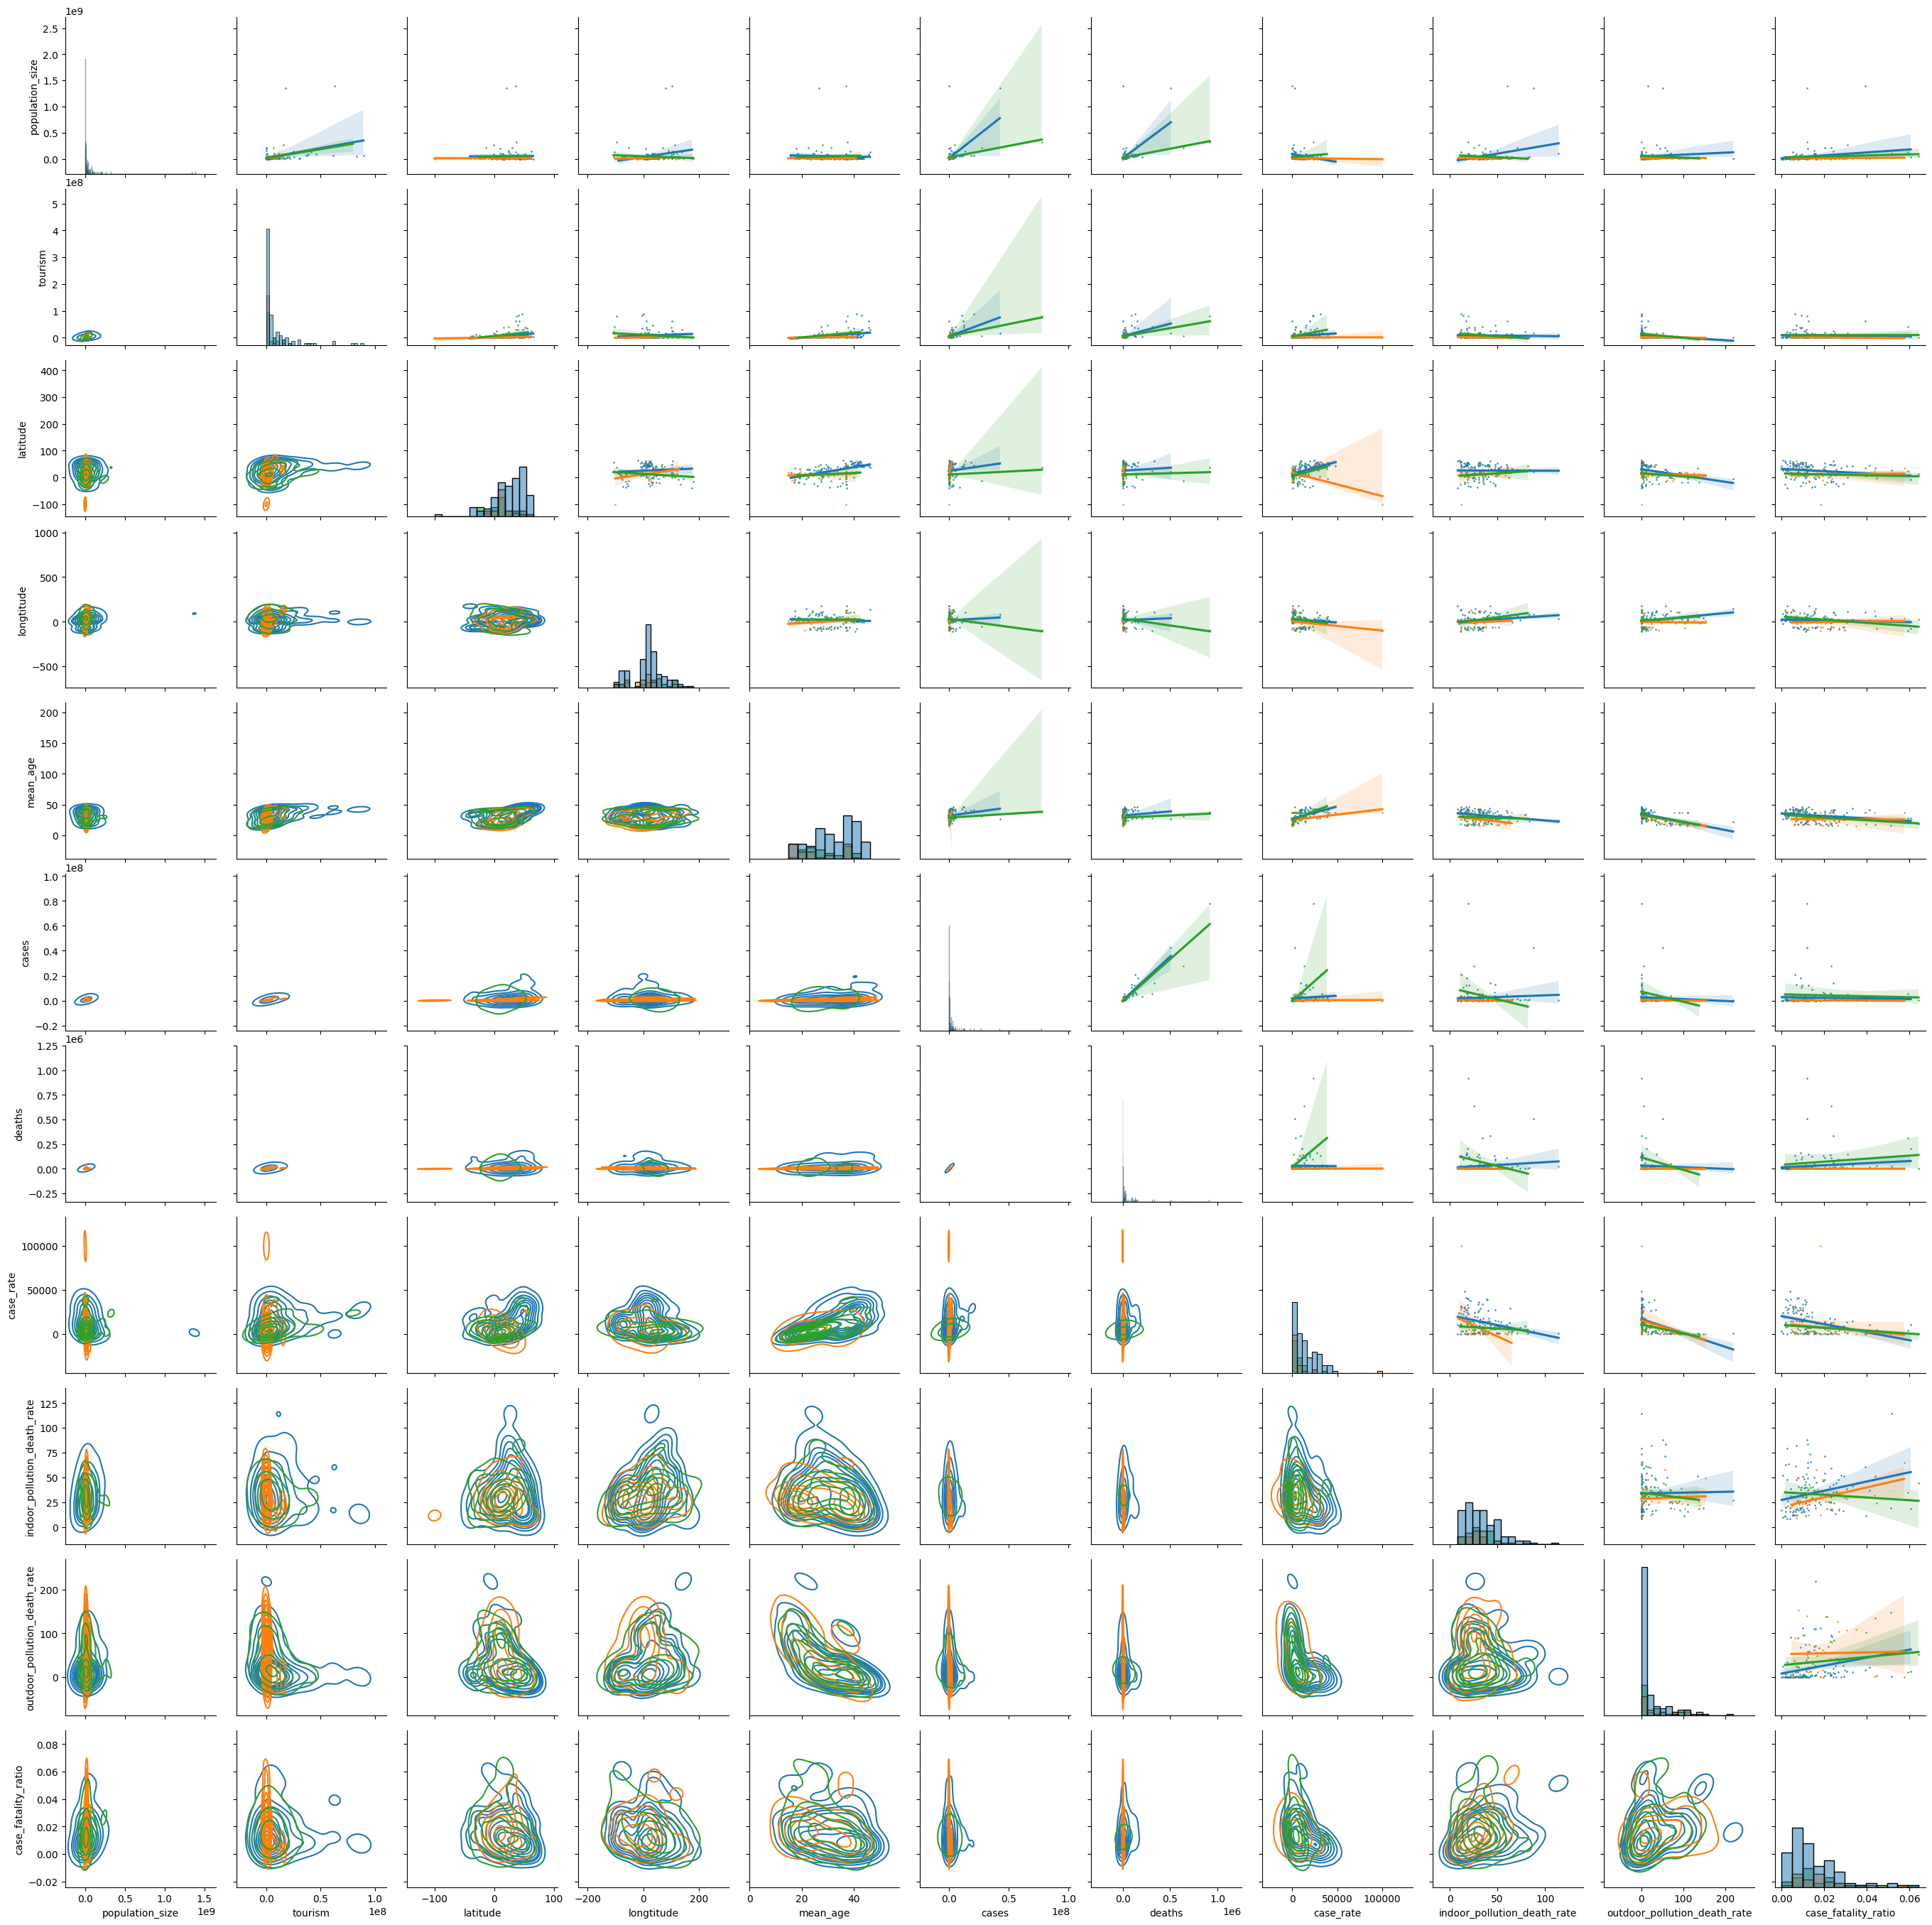

In [ ]:
# Pairplot for large scale analysis: Hist, reg and KDE plot combined

g = sns.PairGrid(data=df, hue = 'lockdown_type')
g.map_diag(sns.histplot)
g.map_upper(sns.regplot, scatter_kws={'alpha':.7, 's':1})
g.map_lower(sns.kdeplot)

# Population Size


**Here I will analyse 'population_size' by variables with high correlations**

In [ ]:
# Pandas setting to allow me to see all rows

pd.set_option("display.max_rows", None)

In [25]:
#Groupby of countries by population sizes allowing me to create population bins

df.groupby(df['country'])['population_size'].sum().sort_values(ascending=False)

,population_size
country,
China,1392730000
India,1352617328
US,326687501
Indonesia,267663435
Pakistan,212215030
...,...
Monaco,38682
Liechtenstein,37910
San Marino,33785


In [26]:
# Creating population bins for easier analysis

df['population_bins'] = pd.cut(df['population_size'],
                               bins = [0,100000,1000000,5000000,10000000,50000000,350000000,1400000000],
                               labels = ['<100k', '100k-1mil', '1mil-5mil', '5mil-10mil', '10mil-50mil', '50mil-350mil', '350mil-1bil+'])

<Axes: xlabel='population_bins', ylabel='count'>

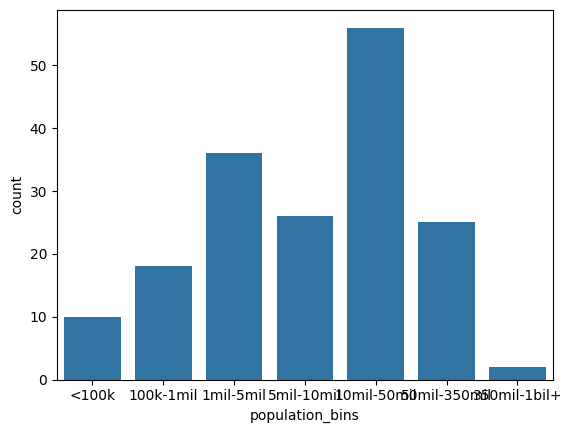

In [27]:
# Quick visualization to see the distribution of bins

sns.countplot(data=df, x='population_bins')

**Quick Bivariate Analysis on chosen columns with 'lockdown_type' as a hue**

In [28]:
df_feat_col = df[['population_size',
 'cases',
 'deaths',
 'case_fatality_ratio',
 'lockdown_type',
 'lockdown_delay']]

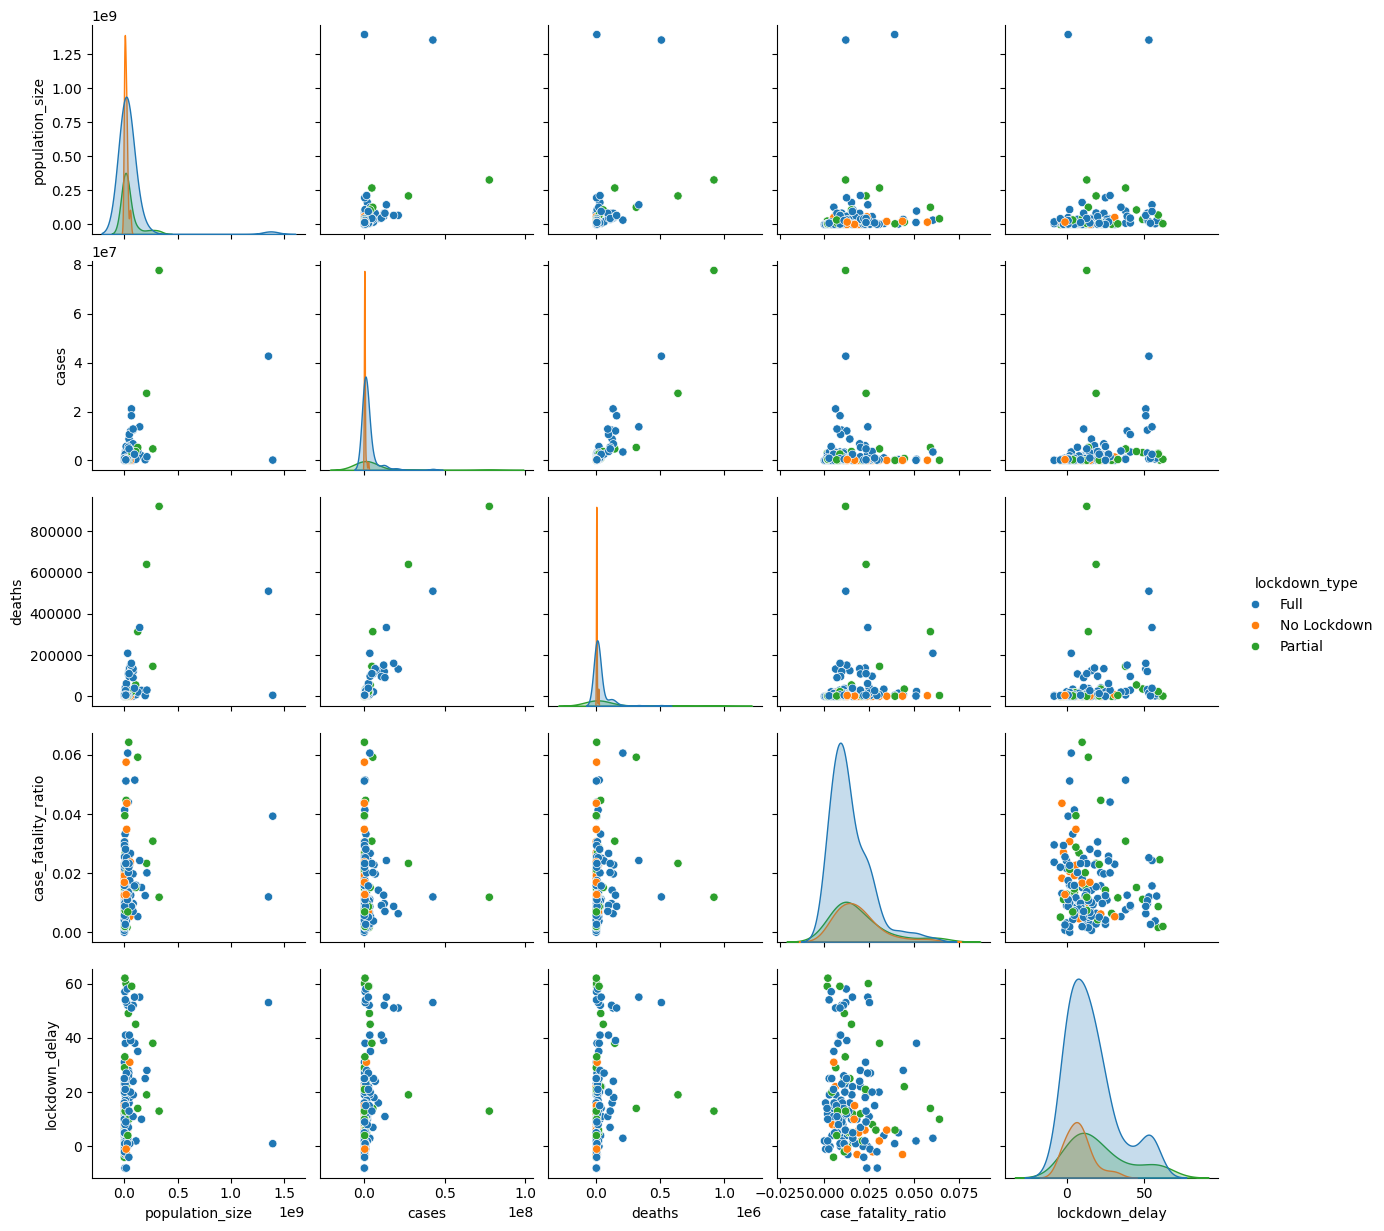

In [ ]:
# Pairplot with above columns

sns.pairplot(data=df_feat_col, hue = 'lockdown_type')

##Cases

**Cases of Covid19 by Population Size**

In [ ]:
#Crosstab (i.e. Pivot Table)

pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['cases']/df['population_size'], aggfunc = lambda x: f"{round(x.mean() * 100, 2)}%")

lockdown_type,Full,No Lockdown,Partial
population_bins,,,
<100k,27.71%,45.06%,14.54%
100k-1mil,16.81%,8.81%,7.18%
1mil-5mil,16.96%,0.64%,11.08%
5mil-10mil,16.88%,0.28%,4.21%
10mil-50mil,9.67%,2.46%,3.86%
50mil-350mil,8.4%,1.34%,8.33%
350mil-1bil+,1.58%,NaN,NaN


Text(0.5, 1.0, 'Covid19 Cases by Population')

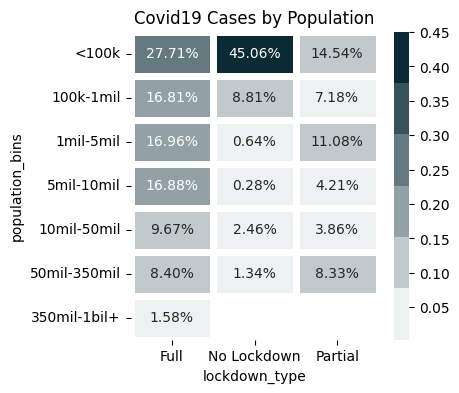

In [ ]:
# Correlation matrix

crosstab = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['cases']/df['population_size'], aggfunc = 'mean')
plt.figure(figsize=(4,4))
sns.heatmap(crosstab, annot=True, cmap=sns.light_palette('#0A2A34'), lw = 5, fmt='.2%')
plt.title('Covid19 Cases by Population')

Text(0.5, 1.0, 'Covid19 Cases by Population')

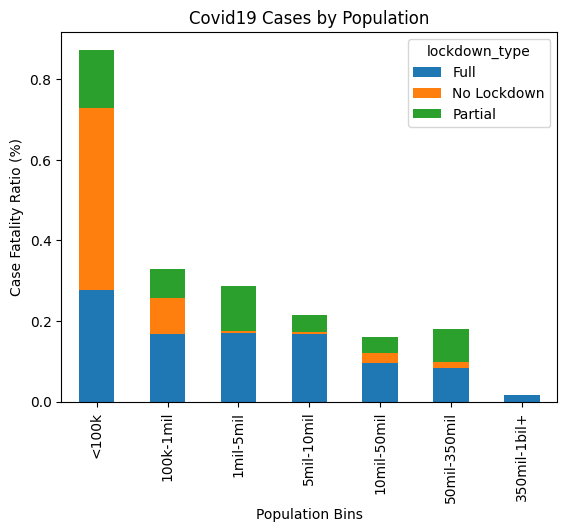

In [ ]:
# Stacked Bar Chart

customdf = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['cases']/df['population_size'], aggfunc = 'mean')

customdf.plot(kind='bar', stacked=True)

plt.ylabel('Case Fatality Ratio (%)')
plt.xlabel('Population Bins')
plt.title('Covid19 Cases by Population')

##Fatalities

**Fatalities of Covid19 by Population Size**

In [ ]:
#Crosstab (i.e. Pivot Table)

pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['deaths']/df['population_size'], aggfunc = lambda x: f"{round(x.mean() * 100, 2)}%")

lockdown_type,Full,No Lockdown,Partial
population_bins,,,
<100k,0.15%,0.72%,0.07%
100k-1mil,0.14%,0.11%,0.09%
1mil-5mil,0.18%,0.01%,0.12%
5mil-10mil,0.14%,0.0%,0.07%
10mil-50mil,0.14%,0.03%,0.05%
50mil-350mil,0.1%,0.01%,0.16%
350mil-1bil+,0.02%,NaN,NaN


Text(0.5, 1.0, 'Covid19 Fatalities by Population')

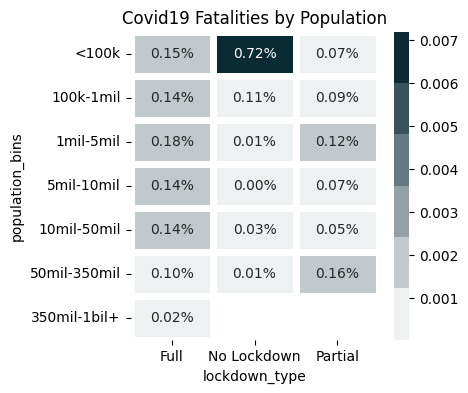

In [29]:
# Correlation Matrix

crosstab = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['deaths']/df['population_size'], aggfunc = 'mean')
plt.figure(figsize=(4,4))
sns.heatmap(crosstab, annot=True, cmap=sns.light_palette('#0A2A34'), lw = 5, fmt='.2%')
plt.title('Covid19 Fatalities by Population')

Text(0.5, 1.0, 'Covid19 Fatalities by Population')

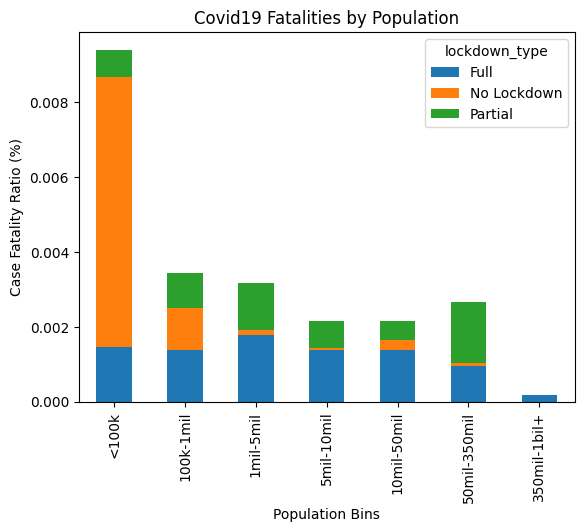

In [30]:
# Stacked Bar Chart

customdf = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['deaths']/df['population_size'], aggfunc = 'mean')

customdf.plot(kind='bar', stacked=True)

plt.ylabel('Case Fatality Ratio (%)')
plt.xlabel('Population Bins')
plt.title('Covid19 Fatalities by Population')

##Case Fatality Ratio

**Fatalities by Cases of Covid19 by Population Size**

In [31]:
#Crosstab (i.e. Pivot Table)

pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['case_fatality_ratio'], aggfunc=lambda x: f"{round(x.mean() * 100, 2)}%")

lockdown_type,Full,No Lockdown,Partial
population_bins,,,
<100k,0.48%,1.45%,0.51%
100k-1mil,0.94%,1.2%,1.29%
1mil-5mil,1.31%,1.89%,1.43%
5mil-10mil,1.06%,1.25%,1.59%
10mil-50mil,1.86%,2.27%,2.34%
50mil-350mil,1.67%,1.45%,2.48%
350mil-1bil+,2.56%,NaN,NaN


Text(0.5, 1.0, 'Covid19 Case Fatality Ratio by Population')

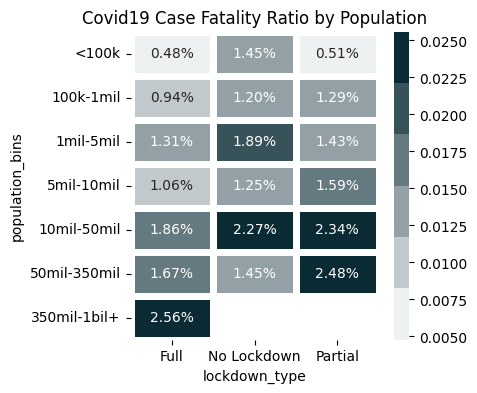

In [32]:
# Correlation Matrix

crosstab = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['case_fatality_ratio'], aggfunc= 'mean')
plt.figure(figsize=(4,4))
sns.heatmap(crosstab, annot=True, cmap=sns.light_palette('#0A2A34'), lw = 5, fmt='.2%')
plt.title('Covid19 Case Fatality Ratio by Population')

Text(0.5, 1.0, 'Covid19 Case Fatality Ratio by Population')

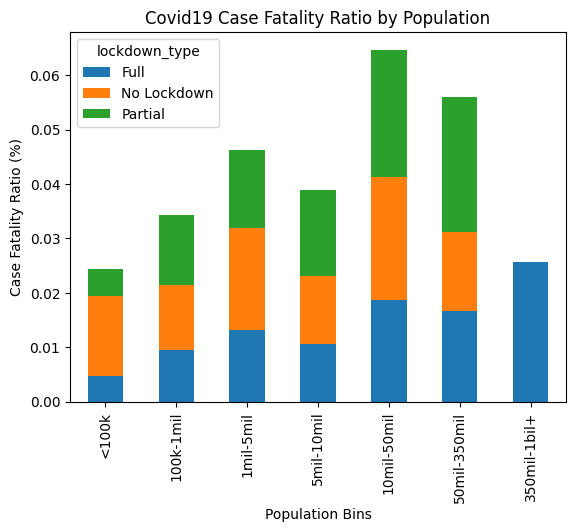

In [33]:
# Stacked Bar Chart

customdf = pd.crosstab(df['population_bins'], df['lockdown_type'], values = df['case_fatality_ratio'], aggfunc= 'mean')

customdf.plot(kind='bar', stacked=True)

plt.ylabel('Case Fatality Ratio (%)')
plt.xlabel('Population Bins')
plt.title('Covid19 Case Fatality Ratio by Population')

**At this point I can see several avenues of interesting further investigation:**

+ The very high cases of covid in low populations
+ The very high case_fatality_ratio of the 2 largest populations
+ The oddly high case numbers in population 50-350mil
  + This is where I will now direct my analysis


#Further Analysis

In [34]:
#I will one hot encode the population types for more in-depth analysis

df2 = pd.get_dummies(df, columns=['population_bins'])
df2.head()

,country,population_size,tourism,date_firstfatality,date_firstconfirmedcase,latitude,longtitude,mean_age,lockdown_date,lockdown_type,...,outdoor_pollution_death_rate,case_fatality_ratio,lockdown_delay,population_bins_<100k,population_bins_100k-1mil,population_bins_1mil-5mil,population_bins_5mil-10mil,population_bins_10mil-50mil,population_bins_50mil-350mil,population_bins_350mil-1bil+
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,...,134.993753,0.044008,28.0,False,False,False,False,True,False,False
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,...,18.280754,0.012734,-2.0,False,False,True,False,False,False,False
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,...,0.191767,0.025706,27.0,False,False,False,False,True,False,False
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,...,0.165664,0.003985,13.0,True,False,False,False,False,False,False
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,2020-03-27,No Lockdown,...,62.199058,0.019266,6.0,False,False,False,False,True,False,False


##50mil-350mil

In [35]:
df2a = df2[df2['population_bins_50mil-350mil'] == True]
df2a.head()

,country,population_size,tourism,date_firstfatality,date_firstconfirmedcase,latitude,longtitude,mean_age,lockdown_date,lockdown_type,...,outdoor_pollution_death_rate,case_fatality_ratio,lockdown_delay,population_bins_<100k,population_bins_100k-1mil,population_bins_1mil-5mil,population_bins_5mil-10mil,population_bins_10mil-50mil,population_bins_50mil-350mil,population_bins_350mil-1bil+
13,Bangladesh,161356039,14000,2020-03-19,2020-03-09,23.684994,90.356331,25.6,2020-03-19,Full,...,61.985378,0.015115,10.0,False,False,False,False,False,True,False
22,Brazil,209469333,6621000,2020-03-18,2020-02-27,-14.235004,-51.925280,31.3,2020-03-17,Partial,...,5.583721,0.023268,19.0,False,False,False,False,False,True,False
36,Congo (Kinshasa),84068091,14000,2020-03-22,2020-03-12,-1.142502,15.852951,37.0,2020-03-31,Full,...,110.905768,0.015342,19.0,False,False,False,False,False,True,False
49,Egypt,98423595,11196000,2020-03-09,2020-02-15,26.820553,30.802498,24.7,2020-03-24,Full,...,0.726384,0.051438,38.0,False,False,False,False,False,True,False
55,Ethiopia,109224559,849000,2020-04-06,2020-03-14,9.145000,40.489673,18.6,2020-03-16,Full,...,70.594079,0.015877,2.0,False,False,False,False,False,True,False


In [36]:
df2a.shape

(25, 24)

Text(0.5, 1.0, '\n Correlation Matrix of Countries between 50-350mil\n')

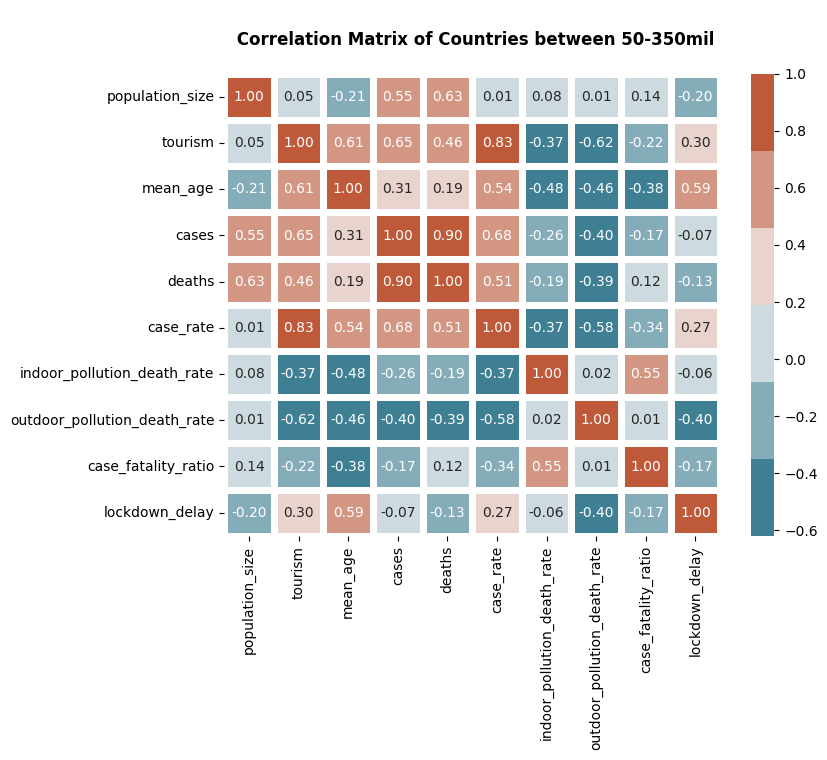

In [37]:
# Further correlation matrix to direct analysis

cols_df2 = ['population_size',
 'tourism',
 'mean_age',
 'cases',
 'deaths',
 'case_rate',
 'indoor_pollution_death_rate',
 'outdoor_pollution_death_rate',
 'case_fatality_ratio',
 'lockdown_delay'
]

df_selected = df2a[cols_df2]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot = True,
            lw = 5,
            cmap=sns.diverging_palette(220,22,),
            fmt='.2f')
plt.title('\n Correlation Matrix of Countries between 50-350mil\n', fontweight='bold')

**Tourism appears well correlated to case_rate, warranting further analysis**

### Tourism by Case rate

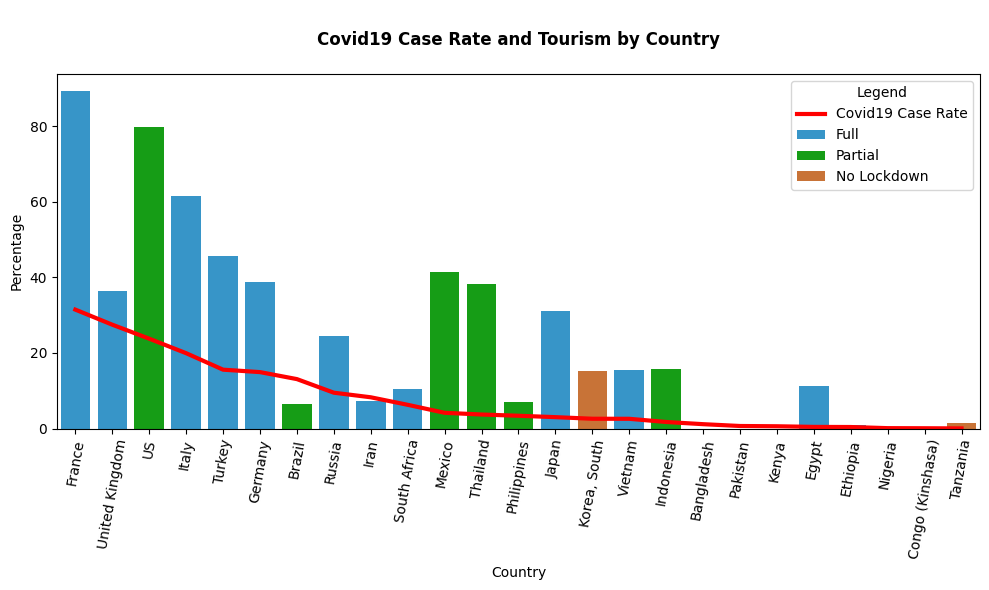

In [39]:
mean_values = df2a.groupby('country').agg({
    'case_rate': 'mean',
    'tourism': 'mean',
    'lockdown_type': lambda x: x.mode().iloc[0]
}).reset_index()

mean_values['case_rate'] = mean_values['case_rate'] / 1000
mean_values['tourism'] = mean_values['tourism'] / 1000000

sorted_mean_values = mean_values.sort_values(by='case_rate', ascending=False)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=sorted_mean_values,
    x='country',
    y='case_rate',
    color='red',
    label='Covid19 Case Rate',
    linewidth=3
)

sns.barplot(
    data=sorted_mean_values,
    x='country',
    y='tourism',
    hue='lockdown_type',
    palette=['#1f9ce0', '#00b300', '#e06f1f'],
    alpha=1
)

plt.title('\nCovid19 Case Rate and Tourism by Country\n', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=80)
plt.legend(title='Legend')
plt.tight_layout()

plt.show()

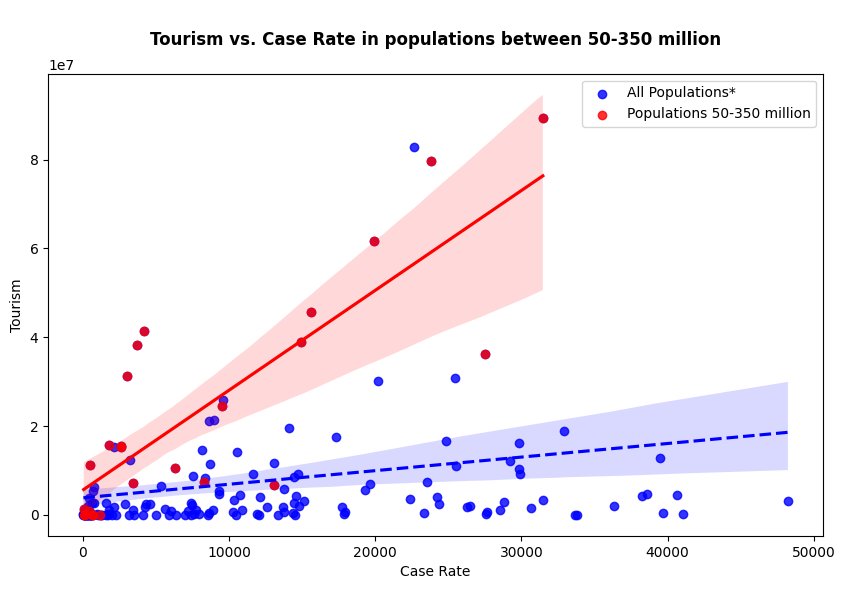

In [40]:
# *'https://www.bmj.com/content/369/bmj.m1632' An interesting case study explaining
# why 'Diamond Princess' has been excluded. Additionaly, China and India excluded
# due to sheer population size difference.

df_excluded = df.loc[~df['country'].isin(['China', 'India', 'Diamond Princess'])]

plt.figure(figsize=(10, 6))
sns.regplot(data=df_excluded, x='case_rate', y='tourism', color='blue', label='All Populations*', line_kws={'linestyle': '--'})
sns.regplot(data=df2a, x='case_rate', y='tourism', color='red', label='Populations ''50-350 million', line_kws={'linestyle': '-'})

plt.xlabel('Case Rate')
plt.ylabel('Tourism')
plt.title('\nTourism vs. Case Rate in populations between ''50-350 million''\n', fontweight = 'bold')
plt.legend()